# Library

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.python.keras.layers import Dense, LSTM, Dropout
from tensorflow.python.keras import Sequential
from math import sqrt;
import tensorflow as tf

In [2]:
# Import pandas library
import pandas as pd
  
# initialize list of lists
data = [[1,2,3,4,5,1], [2,2,2,2,2,2]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data)
  
# print dataframe.
df

0  1  2  3  4  5
0  1  2  3  4  5  1
1  2  2  2  2  2  2

# Preprocessing

## Import data

In [27]:
# import data
url = "https://drive.google.com/file/d/1_LBzbPCrkDpksT37LZoIRs8NyeOocCyr/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-11-01 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-11-01 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-11-01 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-11-01 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-11-01 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4  ...         T9  \
date                                                         ...              
2016-11-01 17:00:00  19.79  44.730000  19.000000  45.566667  ...  17.033333   
2016-11-01 17:10:00  19.79  44.790000  19.000000  45.992500  ...  17.066667   
2016-11-01 17:20:00  19.79  44.933333  18.926667  45.890000  ...  17.000000   
2016-11-01 17:30:00  19.79  45.000000  18.890000  45.723333  ...  17.000000   
2016-11-01 17:40:00  19.79  45.000000  18.890000  45.530000  ...  17.000000   

                      RH_9  T_out  Press_mm_hg  RH_out  Windspeed  Visibility  \
date                                                                            
2016-11-01 17:00:00  45.53   6.60        733.5    92.0   7.000000   63.000000   
2016-11-01 17:10:00  45.56   6.48        733.6    92.0   6.666667   59.166667   
2016-11-01 17:20:00  45.50   6.37        733.7    92.0   6.333333   55.333333   
2016-11-01 17:30:00  45.40   6.25        733.8    92.0   6.000000   51.500000   
2016-11-01 17:40:00  45.40   6.13        733.9    92.0   5.666667   47.666667   

                     Tdewpoint        rv1        rv2  
date                                                  
2016-11-01 17:00:00        5.3  13.275433  13.275433  
2016-11-01 17:10:00        5.2  18.606195  18.606195  
2016-11-01 17:20:00        5.1  28.642668  28.642668  
2016-11-01 17:30:00        5.0  45.410390  45.410390  
2016-11-01 17:40:00        4.9  10.084097  10.084097  

[5 rows x 28 columns]

In [28]:
df.shape

(19735, 28)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-11-01 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [30]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.412580    755.522602   
std    ...      2.014712      4.151497      5.318464      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.670000    750.933333   
50%    ...     19.390000     40.900000      6.920000    756.100000   
75%    ...     20.600000     44.338095     10.400000    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760995     24.988033   
std       14.901088      2.451221     11.794719      4.195248     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.430000     24.897653   
75%       91.666667      5.500000     40.000000      6.570000     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [31]:
# Jumlah missing value
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<AxesSubplot:xlabel='date'>

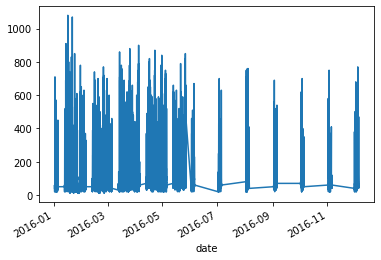

In [32]:
df['Appliances'].plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Appliances', ylabel='Density'>

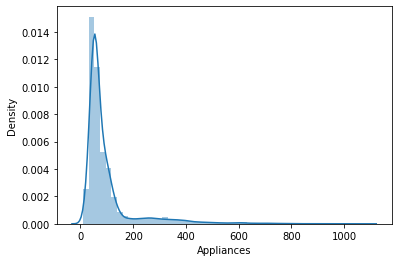

In [33]:
sns.distplot(df['Appliances'])

In [34]:
# Correlation matrix
df.corr()['Appliances']

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015357
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

Feature Extraction (Skenario Atribut)

In [35]:
# Data 1
# All
# df_new = df

# tanpa minus
# df_new = df.drop(df.columns[[5, 13, 15, 17, 19, 21, 22, 26, 27]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[2, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]], axis=1)

# 3 teratas
# df_new = df.drop(df.columns[[2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

# 1 teratas
df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-11-01 17:00:00 to 2016-05-27 18:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Appliances  19735 non-null  int64
dtypes: int64(1)
memory usage: 308.4 KB


In [37]:
values = df_new.values

In [38]:
values.shape

(19735, 1)

## Normalisasi

In [39]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [15]:
# Z-score
# scaled = stats.zscore(values, axis = 0)

#Z-Score
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

## Convert to Time Series

In [40]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [41]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

var1(t-1)   var1(t)
1   0.046729  0.046729
2   0.046729  0.037383
3   0.037383  0.037383
4   0.037383  0.046729
5   0.046729  0.037383

In [42]:
reframed.shape

(19734, 2)

In [43]:
# Data 1

# All
# reframed.drop(reframed.columns[[x for x in range(29, 56)]], axis=1, inplace=True)

# no minus
# reframed.drop(reframed.columns[[x for x in range(20, 38)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
# reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

var1(t-1)   var1(t)
1   0.046729  0.046729
2   0.046729  0.037383
3   0.037383  0.037383
4   0.037383  0.046729
5   0.046729  0.037383

## Split data

In [ ]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model Building

### Random Search

In [ ]:
#design network LSTM
model = Sequential()
model.add(LSTM(38, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_20 (SimpleRNN)    (None, 1, 53)             2915      
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 53)             0         
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (None, 1, 53)             5671      
_________________________________________________________________
dropout_21 (Dropout)         (None, 1, 53)             0         
_________________________________________________________________
simple_rnn_22 (SimpleRNN)    (None, 1, 53)             5671      
_________________________________________________________________
dropout_22 (Dropout)         (None, 1, 53)             0         
_________________________________________________________________
simple_rnn_23 (SimpleRNN)    (None, 1, 53)            

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=80, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/73
198/198 [==============================] - 74s 12ms/step - loss: 0.5355 - val_loss: 0.5272
Epoch 2/73
198/198 [==============================] - 2s 8ms/step - loss: 0.5287 - val_loss: 0.5261
Epoch 3/73
198/198 [==============================] - 2s 9ms/step - loss: 0.5275 - val_loss: 0.5271
Epoch 4/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5286 - val_loss: 0.5269
Epoch 5/73
198/198 [==============================] - 2s 9ms/step - loss: 0.5276 - val_loss: 0.5267
Epoch 6/73
198/198 [==============================] - 2s 9ms/step - loss: 0.5268 - val_loss: 0.5243
Epoch 7/73
198/198 [==============================] - 2s 9ms/step - loss: 0.5262 - val_loss: 0.5233
Epoch 8/73
198/198 [==============================] - 2s 9ms/step - loss: 0.5256 - val_loss: 0.5246
Epoch 9/73
198/198 [==============================] - 2s 9ms/step - loss: 0.5255 - val_loss: 0.5240
Epoch 10/73
198/198 [==============================] - 2s 11ms/step - loss: 0.5245 - val_loss: 0.

### Grid Search

In [ ]:
#design network LSTM
model = Sequential()
model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_17 (SimpleRNN)    (None, 1, 32)             1088      
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, 1, 32)             2080      
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, 1, 32)             2080      
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1, 1)             

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/50
198/198 [==============================] - 4s 9ms/step - loss: 0.7153 - val_loss: 0.6816
Epoch 2/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6815 - val_loss: 0.6823
Epoch 3/50
198/198 [==============================] - 1s 5ms/step - loss: 0.6821 - val_loss: 0.6809
Epoch 4/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6815 - val_loss: 0.6816
Epoch 5/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6815 - val_loss: 0.6814
Epoch 6/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6809 - val_loss: 0.6818
Epoch 7/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6811 - val_loss: 0.6804
Epoch 8/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6812 - val_loss: 0.6814
Epoch 9/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6808 - val_loss: 0.6804
Epoch 10/50
198/198 [==============================] - 1s 5ms/step - loss: 0.6812 - val_loss: 0.6805

# Evaluasi

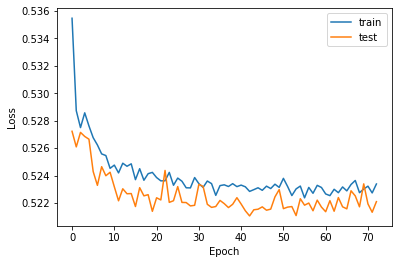

In [ ]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [ ]:
#membuat prediksi training
xhat = model.predict(train_X)
xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
# calculate RMSE
np.seterr(divide='ignore', invalid='ignore')
def mean_absolute_percentage_error(yhat, test_y):
    yhat, test_y = np.array(yhat), np.array(test_y)
    return np.mean(np.abs((yhat, test_y) / test_y))

print('==============minmax===================')
print(f'MAPE test is : {(mean_absolute_percentage_error(test_y, yhat))}')
print(f'MAPE test invert is : {(mean_absolute_percentage_error(inv_y, inv_yhat))}')

print('==============zscore===================')
print(f'MAPE test is : {(mean_absolute_percentage_error(yhat, test_y))}')
print(f'MAPE test invert is : {(mean_absolute_percentage_error(inv_yhat, inv_y))}')

print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.3f' % rmsetest)
rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

print(f'R2 test is : {r2_score(test_y, yhat)}')
print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

==============minmax===================
MAPE test is : 601.1487019777331
MAPE test invert is : 0.9107587709943576
==============zscore===================
MAPE test is : 0.7116027546201439
MAPE test invert is : 1.3159204662299904
RMSE Testing is : 0.833
RMSE Testing invert is : 85.437
R2 test is : 0.305562131649197
R2 test invert is : 0.305562131649197


Actual : [[0.04672897]
 [0.03738318]
 [0.03738318]
 ...
 [0.24299065]
 [0.38317757]
 [0.39252336]]
Predicted: [[0.07946259]
 [0.07946259]
 [0.07946259]
 ...
 [0.07946259]
 [0.07946259]
 [0.07946259]]


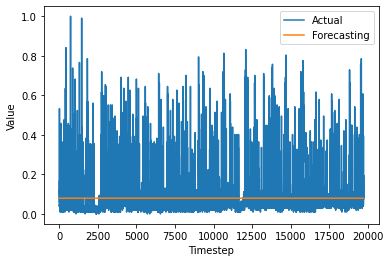

In [ ]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.plot(test_y, label='Actual')
pyplot.plot(yhat, label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

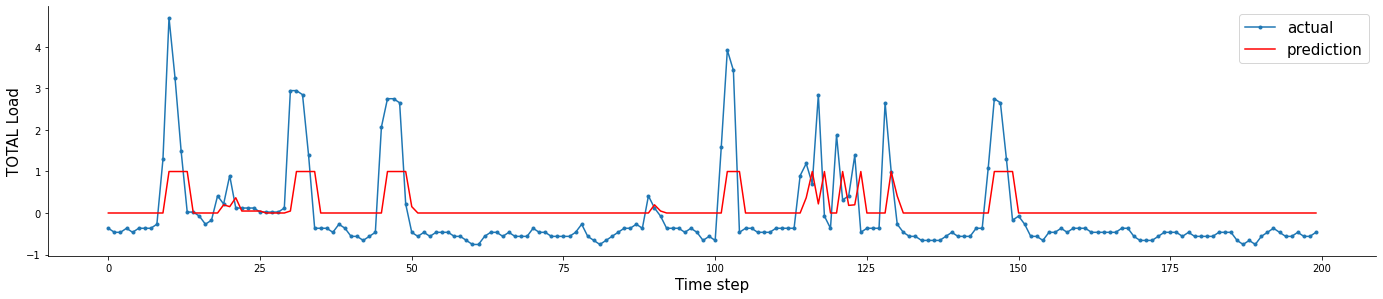

In [ ]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(20,4))
pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('TOTAL Load', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

# 5 run grid

## tanh zscore

mkdir: cannot create directory ‘foto’: File exists
Epoch 1/50
198/198 [==============================] - 15s 21ms/step - loss: 0.9633 - val_loss: 0.7265
Epoch 2/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6995 - val_loss: 0.6841
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6825 - val_loss: 0.6804
Epoch 4/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6801 - val_loss: 0.6793
Epoch 5/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6796 - val_loss: 0.6787
Epoch 6/50
198/198 [==============================] - 3s 17ms/step - loss: 0.6789 - val_loss: 0.6784
Epoch 7/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6788 - val_loss: 0.6784
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6786 - val_loss: 0.6785
Epoch 9/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6785 - val_loss: 0.6784
Epoch 10/50
198/198 [==================

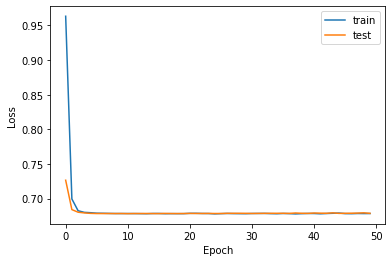

==============minmax===================
MAPE test is : 1.44155
MAPE test invert is : 0.76536
==============zscore===================
MAPE test is : 4281693.98122
MAPE test invert is : 0.45881
RMSE Testing is : 0.824
RMSE Testing invert is : 84.463
R2 test is : 0.32130


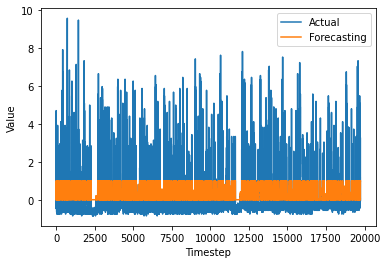

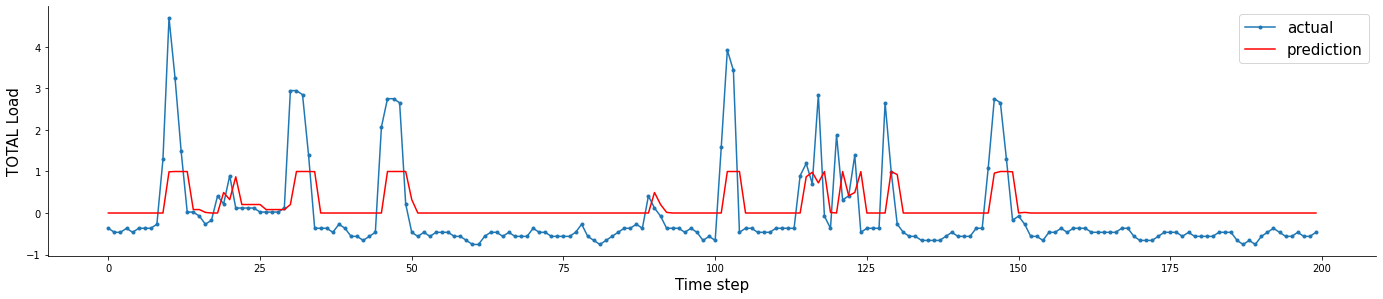

Epoch 1/50
198/198 [==============================] - 16s 23ms/step - loss: 0.9849 - val_loss: 0.7403
Epoch 2/50
198/198 [==============================] - 2s 12ms/step - loss: 0.7073 - val_loss: 0.6858
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6830 - val_loss: 0.6805
Epoch 4/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6802 - val_loss: 0.6791
Epoch 5/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6791 - val_loss: 0.6788
Epoch 6/50
198/198 [==============================] - 3s 17ms/step - loss: 0.6788 - val_loss: 0.6785
Epoch 7/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6787 - val_loss: 0.6784
Epoch 8/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6786 - val_loss: 0.6783
Epoch 9/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6785 - val_loss: 0.6783
Epoch 10/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6785 - val_l

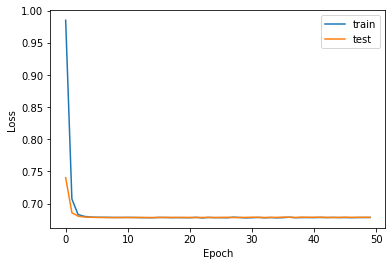

==============minmax===================
MAPE test is : 1.45335
MAPE test invert is : 0.76614
==============zscore===================
MAPE test is : 1945985.16222
MAPE test invert is : 0.45889
RMSE Testing is : 0.824
RMSE Testing invert is : 84.453
R2 test is : 0.32147


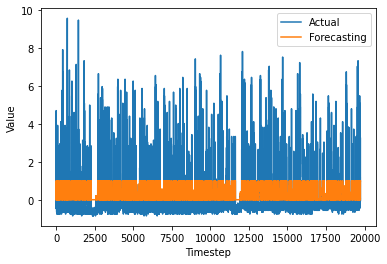

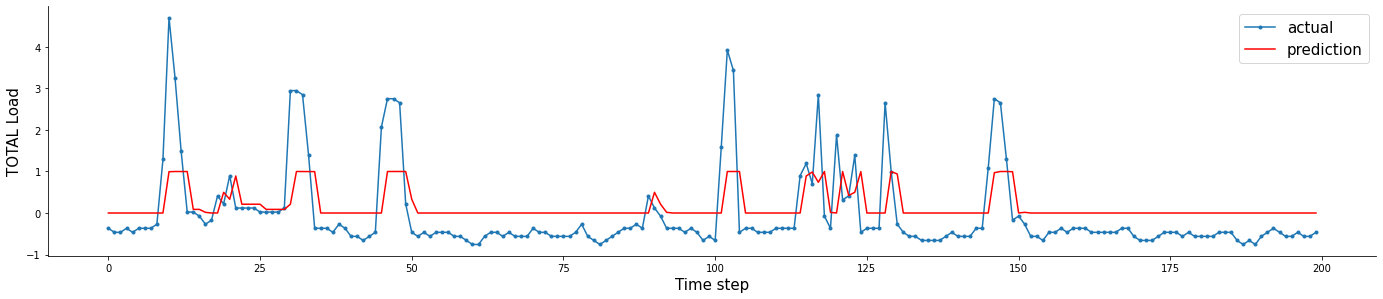

Epoch 1/50
198/198 [==============================] - 14s 22ms/step - loss: 0.9731 - val_loss: 0.7328
Epoch 2/50
198/198 [==============================] - 2s 10ms/step - loss: 0.7024 - val_loss: 0.6845
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6823 - val_loss: 0.6802
Epoch 4/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6802 - val_loss: 0.6791
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6791 - val_loss: 0.6786
Epoch 6/50
198/198 [==============================] - 3s 16ms/step - loss: 0.6789 - val_loss: 0.6785
Epoch 7/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6789 - val_loss: 0.6784
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6784 - val_loss: 0.6784
Epoch 9/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6784 - val_loss: 0.6783
Epoch 10/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6782 - val_l

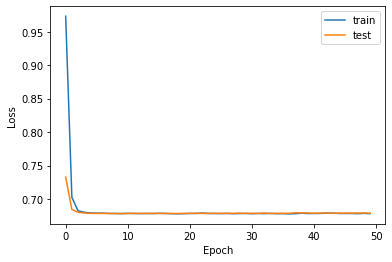

==============minmax===================
MAPE test is : 1.44244
MAPE test invert is : 0.76525
==============zscore===================
MAPE test is : 2051083.18793
MAPE test invert is : 0.45881
RMSE Testing is : 0.824
RMSE Testing invert is : 84.471
R2 test is : 0.32116


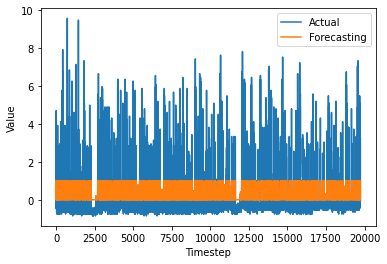

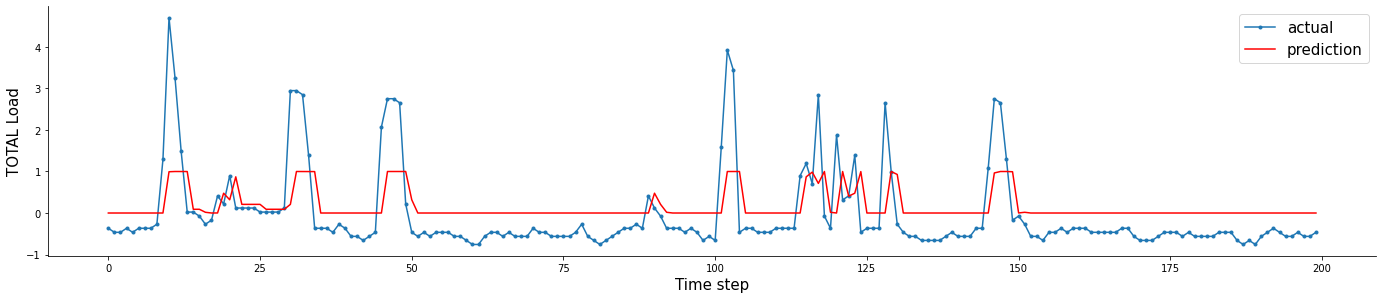

Epoch 1/50
198/198 [==============================] - 15s 17ms/step - loss: 0.9715 - val_loss: 0.7314
Epoch 2/50
198/198 [==============================] - 2s 12ms/step - loss: 0.7018 - val_loss: 0.6841
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6821 - val_loss: 0.6801
Epoch 4/50
198/198 [==============================] - 3s 17ms/step - loss: 0.6797 - val_loss: 0.6791
Epoch 5/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6790 - val_loss: 0.6787
Epoch 6/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6789 - val_loss: 0.6786
Epoch 7/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6785 - val_loss: 0.6784
Epoch 8/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6783 - val_loss: 0.6783
Epoch 9/50
198/198 [==============================] - 4s 18ms/step - loss: 0.6784 - val_loss: 0.6784
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6786 - val_l

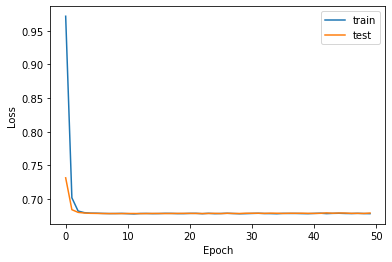

==============minmax===================
MAPE test is : 1.42767
MAPE test invert is : 0.76442
==============zscore===================
MAPE test is : 2068846.52560
MAPE test invert is : 0.45876
RMSE Testing is : 0.824
RMSE Testing invert is : 84.485
R2 test is : 0.32094


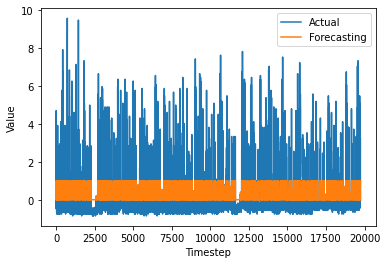

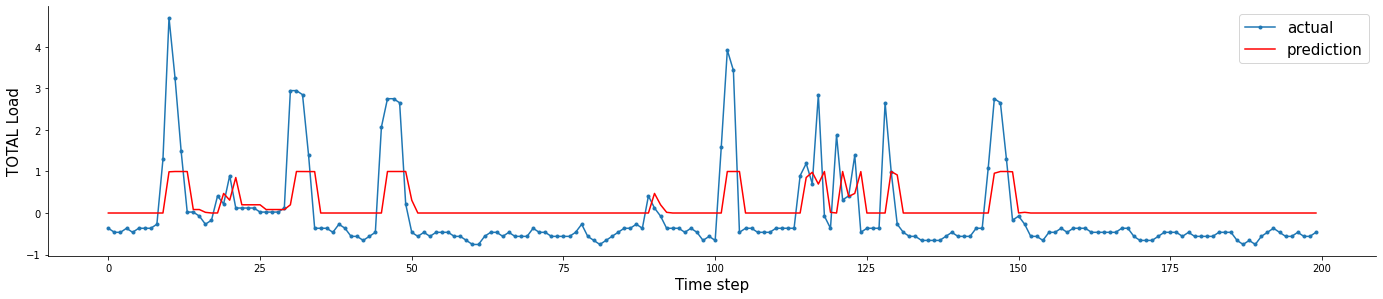

Epoch 1/50
198/198 [==============================] - 14s 16ms/step - loss: 0.9715 - val_loss: 0.7301
Epoch 2/50
198/198 [==============================] - 3s 18ms/step - loss: 0.7016 - val_loss: 0.6844
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6822 - val_loss: 0.6802
Epoch 4/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6799 - val_loss: 0.6791
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6794 - val_loss: 0.6786
Epoch 6/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6790 - val_loss: 0.6785
Epoch 7/50
198/198 [==============================] - 3s 16ms/step - loss: 0.6790 - val_loss: 0.6783
Epoch 8/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6784 - val_loss: 0.6783
Epoch 9/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6787 - val_loss: 0.6784
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6782 - val_l

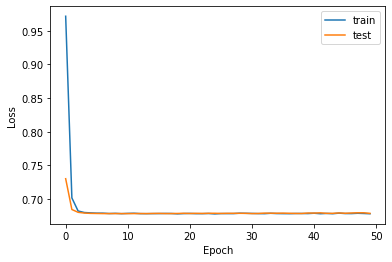

==============minmax===================
MAPE test is : 1.44002
MAPE test invert is : 0.76532
==============zscore===================
MAPE test is : 4659134.14413
MAPE test invert is : 0.45868
RMSE Testing is : 0.824
RMSE Testing invert is : 84.457
R2 test is : 0.32139


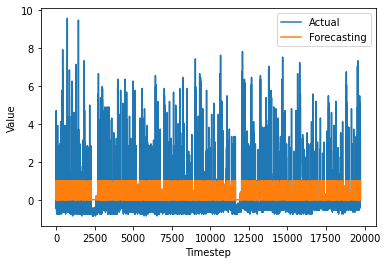

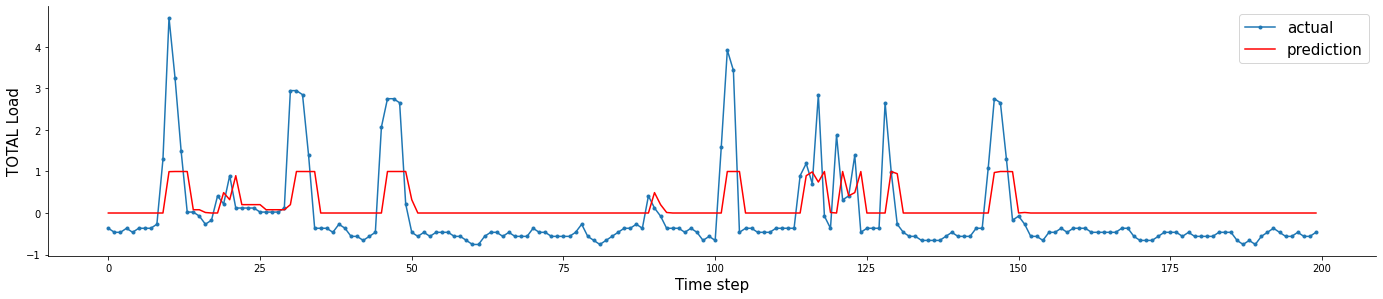

0                   1                    2  \
0  1,4415534097741183  1,4533531709182068   1,4424371312249977   
1  0,7653602115770687  0,7661440356057795   0,7652515371270943   
2   4281693,981221252  1945985,1622213703   2051083,1879254908   
3  0,4588132272063042  0,4588893724983491  0,45881477441366614   
4  0.8238520153703938  0.8237494325205185   0.8239325178763524   
5   84,46319767947422   84,45268065048616    84,47145098097451   
6   0,321297599704676  0,3214666079501711  0,32116495473340145   
7                 133                 136                  135   

                     3                    4           nama  
0    1,427674272588169   1,4400178621703872        mminmax  
1   0,7644189212062927   0,7653166696092404  minmax invert  
2   2068846,5256025326    4659134,144125159         zscore  
3  0,45876240695510084  0,45868241035422486  zscpre invert  
4   0.8240686347588289   0.8237946230595461           rmse  
5    84,48540599587723    84,45731368816757    rmse invert  
6   0,3209406437842184  0,32139215780887376             r2  
7                  141                  137          waktu

In [22]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network LSTM
  model = Sequential()
  model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.show()
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## tanh minmax

Epoch 1/50
198/198 [==============================] - 15s 17ms/step - loss: 0.0565 - val_loss: 0.0099
Epoch 2/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 3/50
198/198 [==============================] - 4s 19ms/step - loss: 0.0088 - val_loss: 0.0073
Epoch 4/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0068 - val_loss: 0.0048
Epoch 5/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 6/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 7/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 8/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 9/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0044 - val_l

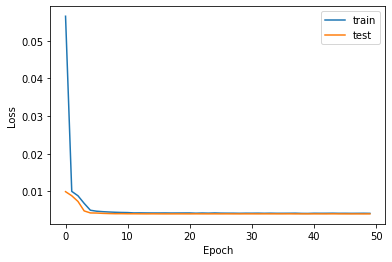

==============minmax===================
MAPE test is : 81942891731.22194
MAPE test invert is : 0.34850
==============zscore===================
MAPE test is : 0.33023
MAPE test invert is : 0.28931
RMSE Testing is : 0.063
RMSE Testing invert is : 67.891
R2 test is : 0.56150


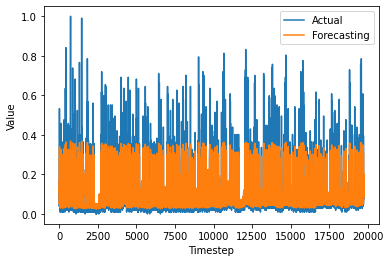

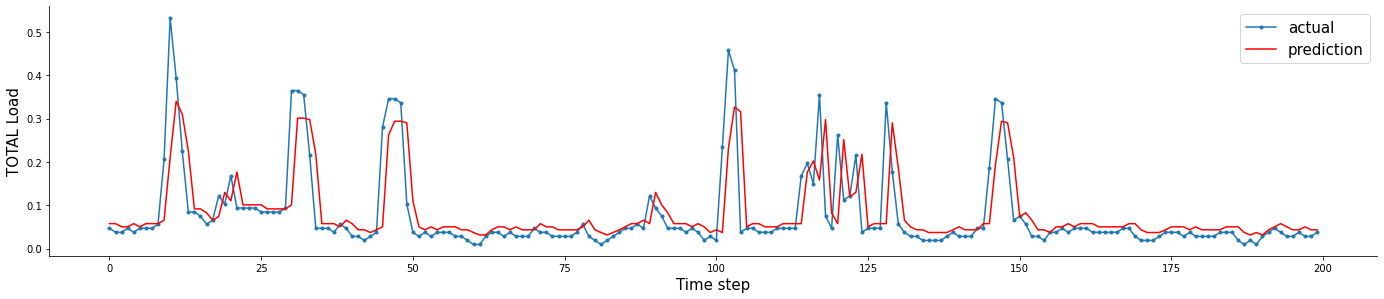

Epoch 1/50
198/198 [==============================] - 16s 19ms/step - loss: 0.0586 - val_loss: 0.0102
Epoch 2/50
198/198 [==============================] - 4s 19ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0093 - val_loss: 0.0080
Epoch 4/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0077 - val_loss: 0.0058
Epoch 5/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 6/50
198/198 [==============================] - 4s 19ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 7/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 8/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 9/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 10/50
198/198 [==============================] - 4s 22ms/step - loss: 0.0045 - val_l

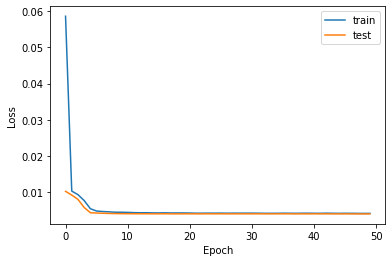

==============minmax===================
MAPE test is : 82341529571.59641
MAPE test invert is : 0.35081
==============zscore===================
MAPE test is : 0.33138
MAPE test invert is : 0.29040
RMSE Testing is : 0.063
RMSE Testing invert is : 67.823
R2 test is : 0.56237


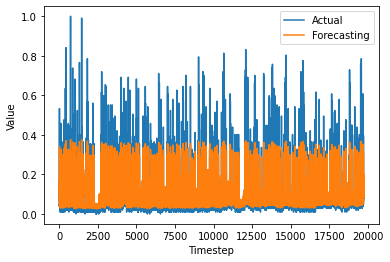

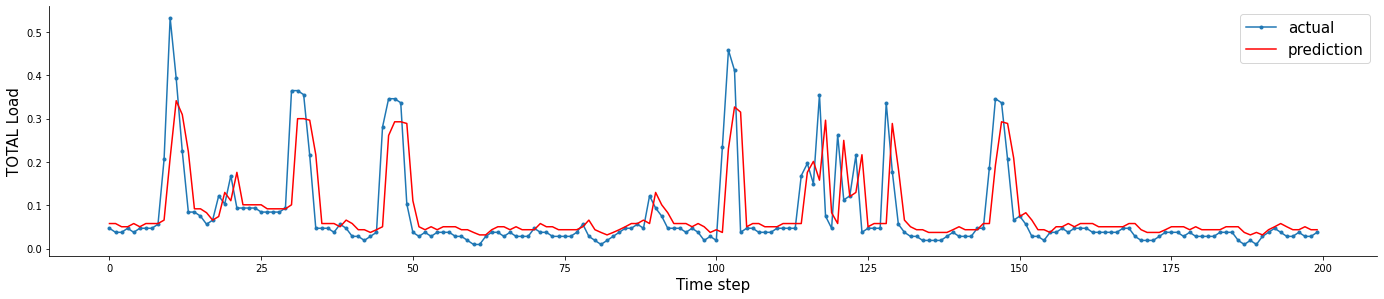

Epoch 1/50
198/198 [==============================] - 17s 25ms/step - loss: 0.0560 - val_loss: 0.0101
Epoch 2/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 3/50
198/198 [==============================] - 4s 19ms/step - loss: 0.0092 - val_loss: 0.0079
Epoch 4/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0075 - val_loss: 0.0055
Epoch 5/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 6/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 7/50
198/198 [==============================] - 4s 20ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 8/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 9/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 10/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0044 - val_l

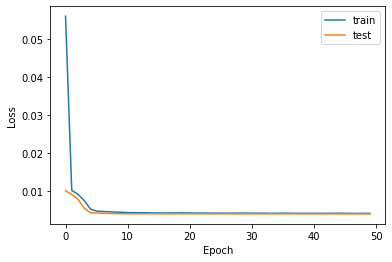

==============minmax===================
MAPE test is : 78391468220.88092
MAPE test invert is : 0.32725
==============zscore===================
MAPE test is : 0.32173
MAPE test invert is : 0.28117
RMSE Testing is : 0.063
RMSE Testing invert is : 67.724
R2 test is : 0.56366


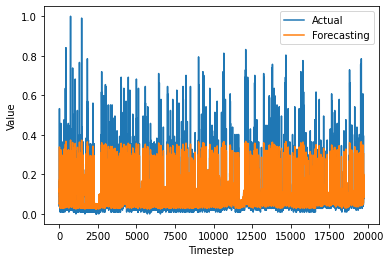

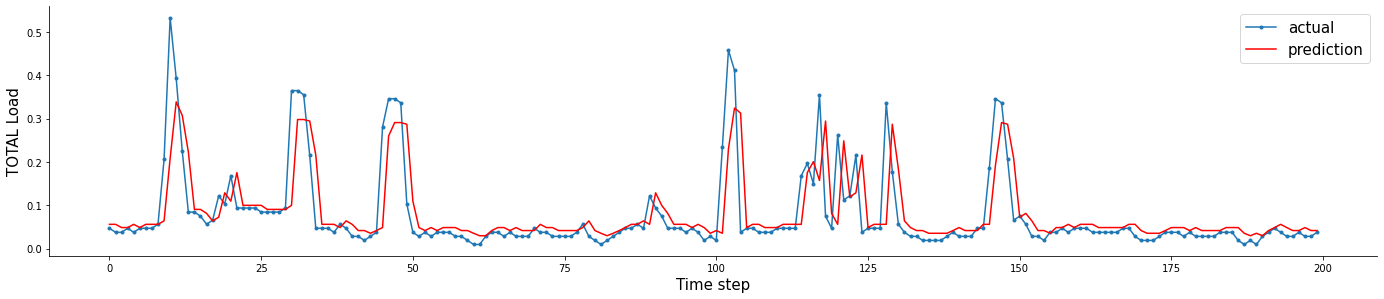

Epoch 1/50
198/198 [==============================] - 19s 22ms/step - loss: 0.0554 - val_loss: 0.0099
Epoch 2/50
198/198 [==============================] - 4s 19ms/step - loss: 0.0099 - val_loss: 0.0087
Epoch 3/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0086 - val_loss: 0.0070
Epoch 4/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0064 - val_loss: 0.0045
Epoch 5/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 6/50
198/198 [==============================] - 3s 17ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 7/50
198/198 [==============================] - 3s 16ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 8/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 9/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 10/50
198/198 [==============================] - 4s 19ms/step - loss: 0.0044 - val_l

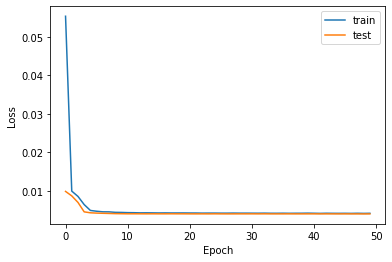

==============minmax===================
MAPE test is : 80357089874.04929
MAPE test invert is : 0.33446
==============zscore===================
MAPE test is : 0.32524
MAPE test invert is : 0.28445
RMSE Testing is : 0.063
RMSE Testing invert is : 67.778
R2 test is : 0.56296


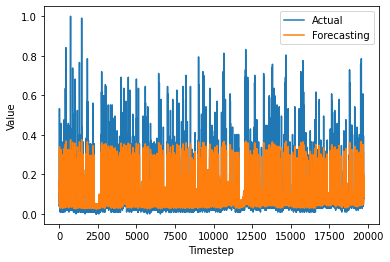

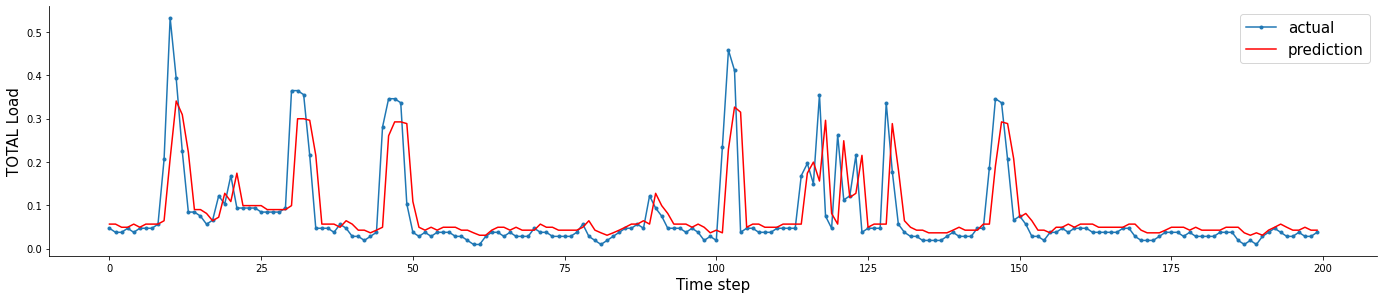

Epoch 1/50
198/198 [==============================] - 15s 24ms/step - loss: 0.0557 - val_loss: 0.0101
Epoch 2/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 3/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0091 - val_loss: 0.0078
Epoch 4/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0074 - val_loss: 0.0053
Epoch 5/50
198/198 [==============================] - 4s 21ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 6/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 7/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 9/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 10/50
198/198 [==============================] - 3s 17ms/step - loss: 0.0044 - val_l

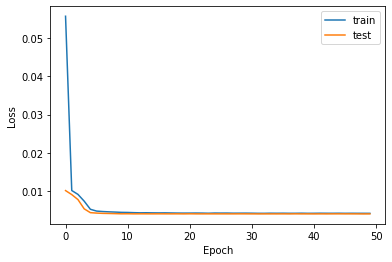

==============minmax===================
MAPE test is : 79992800522.61798
MAPE test invert is : 0.33092
==============zscore===================
MAPE test is : 0.32415
MAPE test invert is : 0.28340
RMSE Testing is : 0.063
RMSE Testing invert is : 67.867
R2 test is : 0.56181


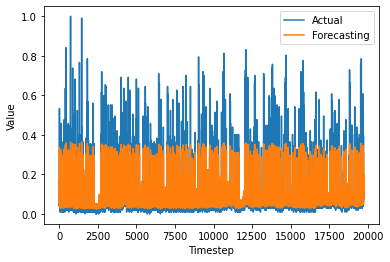

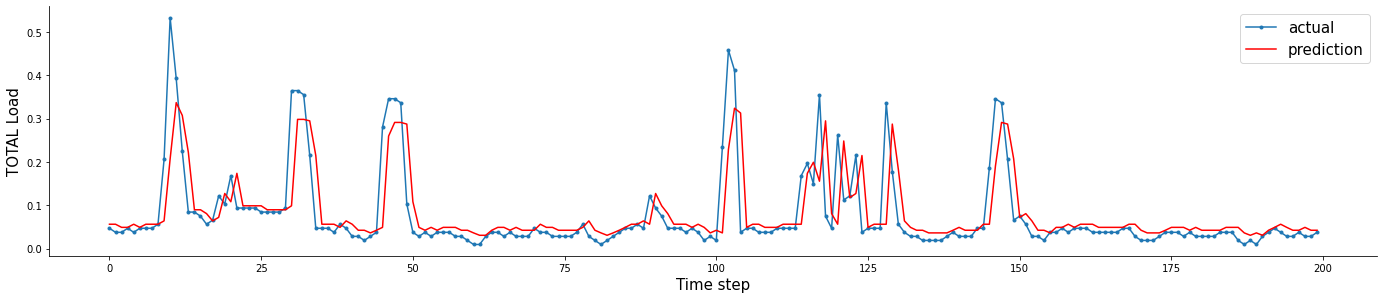

0                    1                    2  \
0    81942891731,22194     82341529571,5964    78391468220,88092   
1   0,3484991962742598   0,3508098596522175   0,3272496064285994   
2  0,33023355524934234   0,3313810437455587   0,3217330260039383   
3   0,2893072775479035  0,29039500738842894   0,2811696621840729   
4  0.06344965593204828    0.063386403335455  0.06329331794951956   
5    67,89113184729166    67,82345156893685    67,72385020598593   
6   0,5614991448064777   0,5623729869795971   0,5636573875944224   
7                  130                  214                  171   

                     3                    4           nama  
0    80357089874,04929    79992800522,61798        mminmax  
1   0,3344552829902248  0,33091583980256944  minmax invert  
2   0,3252365012144408   0,3241460294192566         zscore  
3   0,2844537254756233   0,2833994435659286  zscpre invert  
4  0.06334363085829744  0.06342682090005544           rmse  
5    67,77768501837825    67,86669836305931    rmse invert  
6   0,5629633999056078   0,5618147140267555             r2  
7                  216                  213          waktu

In [44]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto2") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto2")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto2")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig minmax

mkdir: cannot create directory ‘foto3’: File exists
Epoch 1/50
198/198 [==============================] - 17s 18ms/step - loss: 0.0174 - val_loss: 0.0092
Epoch 2/50
198/198 [==============================] - 3s 17ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 3s 17ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 10/50
198/198 [=================

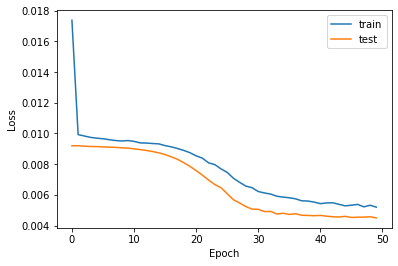

==============minmax===================
MAPE test is : 121095307017.21942
MAPE test invert is : 0.48134
==============zscore===================
MAPE test is : 0.42428
MAPE test invert is : 0.37526
RMSE Testing is : 0.067
RMSE Testing invert is : 71.748
R2 test is : 0.51026


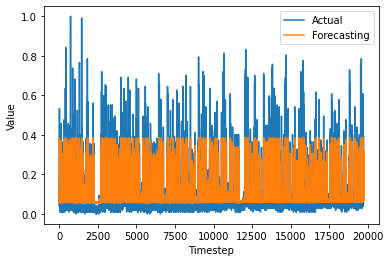

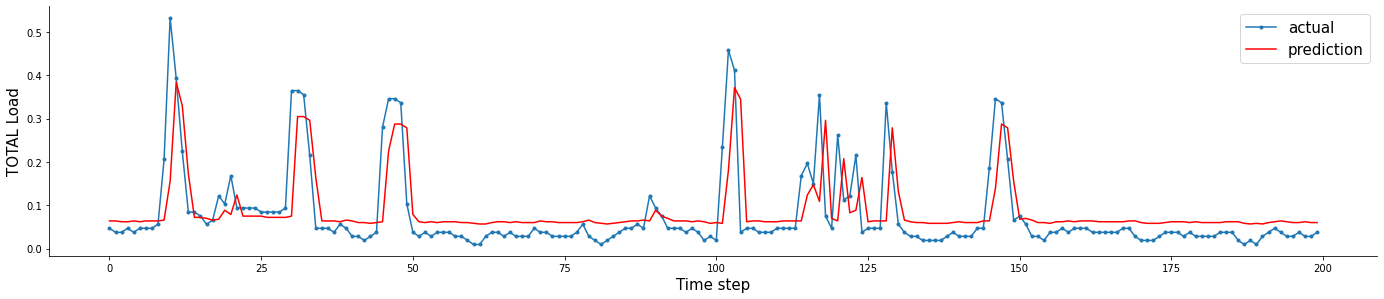

Epoch 1/50
198/198 [==============================] - 17s 22ms/step - loss: 0.0274 - val_loss: 0.0092
Epoch 2/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 3s 16ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 3s 16ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 4s 18ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 10/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0095 - val_l

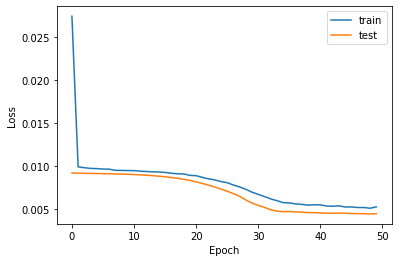

==============minmax===================
MAPE test is : 118892300595.18774
MAPE test invert is : 0.47335
==============zscore===================
MAPE test is : 0.41575
MAPE test invert is : 0.36775
RMSE Testing is : 0.067
RMSE Testing invert is : 71.469
R2 test is : 0.51406


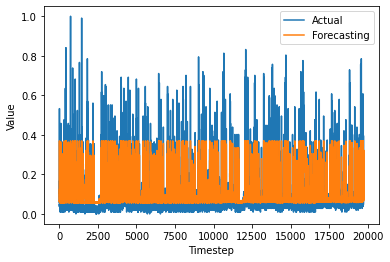

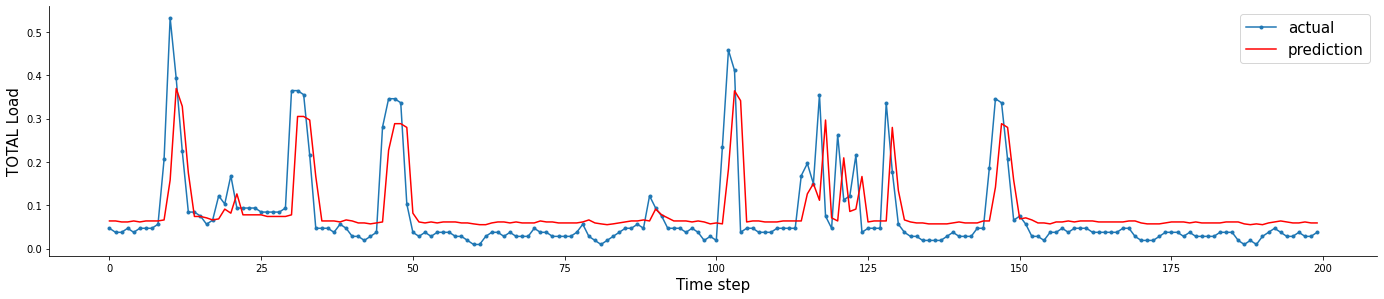

Epoch 1/50
198/198 [==============================] - 14s 17ms/step - loss: 0.0373 - val_loss: 0.0093
Epoch 2/50
198/198 [==============================] - 2s 13ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 4s 18ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 2s 13ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 3s 18ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 10/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0095 - val_l

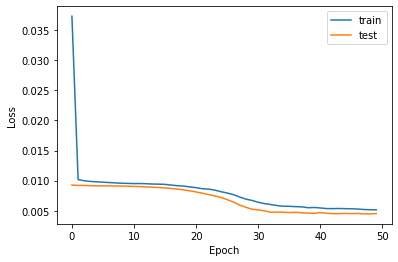

==============minmax===================
MAPE test is : 113408398807.42168
MAPE test invert is : 0.43608
==============zscore===================
MAPE test is : 0.42213
MAPE test invert is : 0.37139
RMSE Testing is : 0.067
RMSE Testing invert is : 71.959
R2 test is : 0.50738


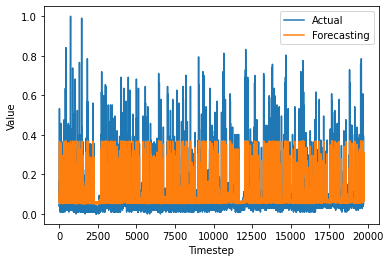

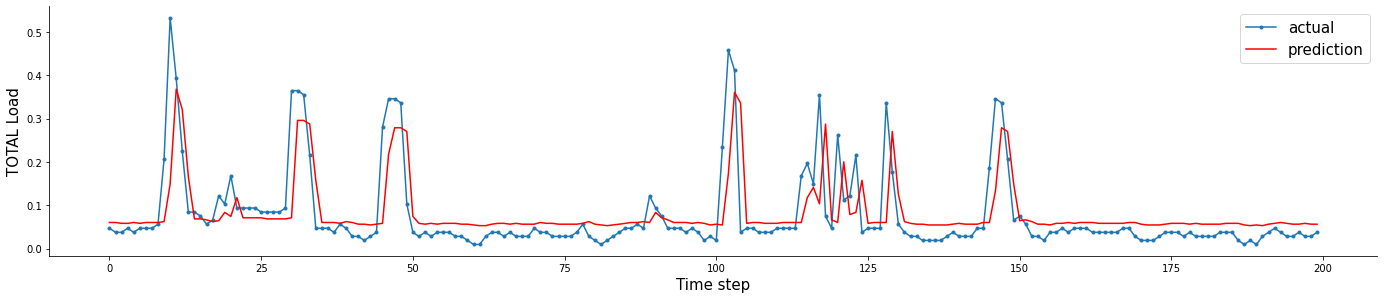

Epoch 1/50
198/198 [==============================] - 17s 24ms/step - loss: 0.0448 - val_loss: 0.0093
Epoch 2/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 3s 17ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 2s 13ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 10/50
198/198 [==============================] - 3s 17ms/step - loss: 0.0096 - val_l

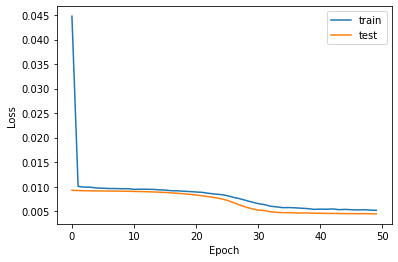

==============minmax===================
MAPE test is : 118006293726.80420
MAPE test invert is : 0.46577
==============zscore===================
MAPE test is : 0.41537
MAPE test invert is : 0.36689
RMSE Testing is : 0.067
RMSE Testing invert is : 71.339
R2 test is : 0.51582


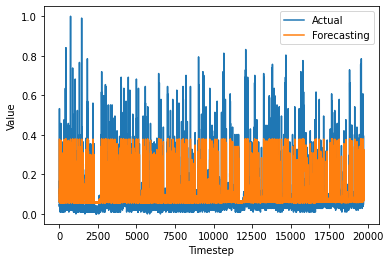

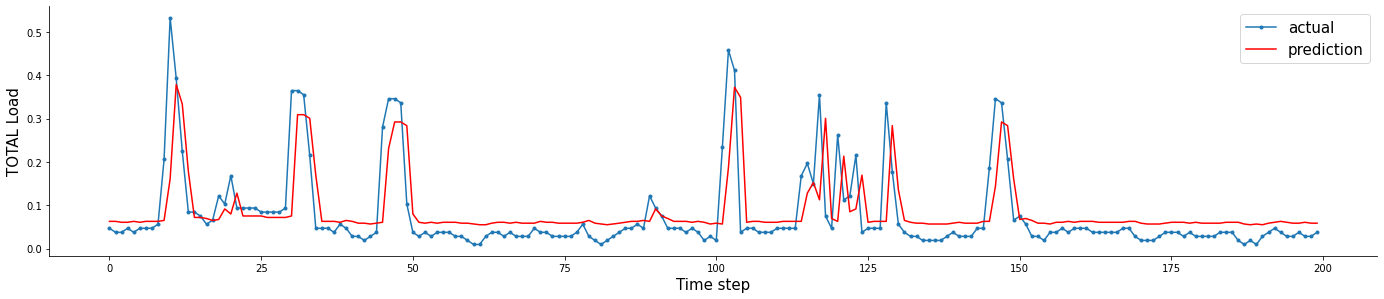

Epoch 1/50
198/198 [==============================] - 15s 20ms/step - loss: 0.0420 - val_loss: 0.0092
Epoch 2/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 4s 19ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 3s 17ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 10/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0095 - val_l

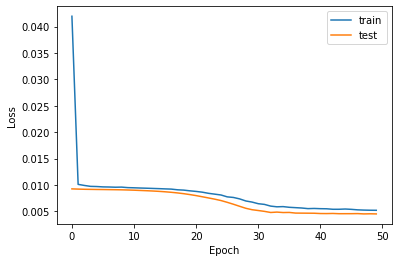

==============minmax===================
MAPE test is : 116625681200.10161
MAPE test invert is : 0.45506
==============zscore===================
MAPE test is : 0.42170
MAPE test invert is : 0.37186
RMSE Testing is : 0.067
RMSE Testing invert is : 71.773
R2 test is : 0.50992


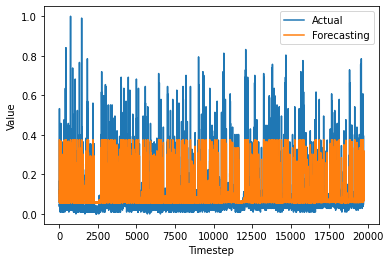

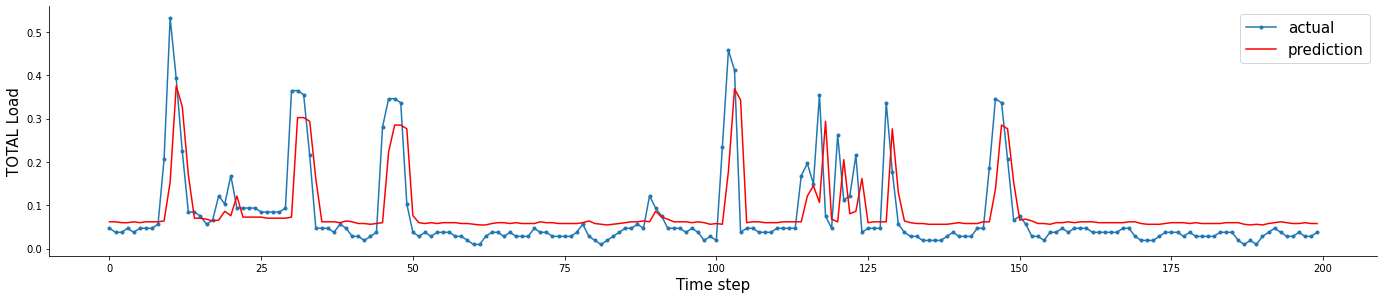

0                    1                    2  \
0   121095307017,21942   118892300595,18774   113408398807,42168   
1   0,4813358354871689  0,47334820236249525   0,4360838723771949   
2   0,4242826985784349    0,415746309649657  0,42213216785197716   
3  0,37526102842536196  0,36775470502268715  0,37139273435928316   
4  0.06705443515517627   0.0667936827742637  0.06725154022906502   
5     71,7482456160386    71,46924056846215    71,95914804509957   
6   0,5102584866400399   0,5140599643942092   0,5073750856636465   
7                  152                  160                  153   

                     3                    4           nama  
0    118006293726,8042   116625681200,10161        mminmax  
1   0,4657710779679214  0,45505579703736576  minmax invert  
2  0,41537092410064647  0,42170328368805604         zscore  
3   0,3668883120409467  0,37185688910518083  zscpre invert  
4  0.06667241649582438  0.06707741169181773           rmse  
5    71,33948565053207    71,77283051024497    rmse invert  
6   0,5158228450788187   0,5099228043939938             r2  
7                  152                  213          waktu

In [45]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto3
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto3") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto3")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto3")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig zscore

Epoch 1/50
198/198 [==============================] - 16s 17ms/step - loss: 1.0530 - val_loss: 1.0009
Epoch 2/50
198/198 [==============================] - 2s 11ms/step - loss: 0.9976 - val_loss: 0.9928
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.9908 - val_loss: 0.9827
Epoch 4/50
198/198 [==============================] - 3s 15ms/step - loss: 0.9764 - val_loss: 0.9613
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 0.9519 - val_loss: 0.9281
Epoch 6/50
198/198 [==============================] - 2s 12ms/step - loss: 0.9188 - val_loss: 0.8872
Epoch 7/50
198/198 [==============================] - 2s 12ms/step - loss: 0.8811 - val_loss: 0.8452
Epoch 8/50
198/198 [==============================] - 2s 10ms/step - loss: 0.8428 - val_loss: 0.8055
Epoch 9/50
198/198 [==============================] - 3s 16ms/step - loss: 0.8058 - val_loss: 0.7712
Epoch 10/50
198/198 [==============================] - 2s 11ms/step - loss: 0.7752 - val_l

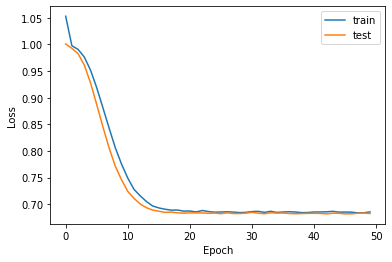

==============minmax===================
MAPE test is : 1.32155
MAPE test invert is : 0.76313
==============zscore===================
MAPE test is : 953.50498
MAPE test invert is : 0.46088
RMSE Testing is : 0.826
RMSE Testing invert is : 84.707
R2 test is : 0.31737


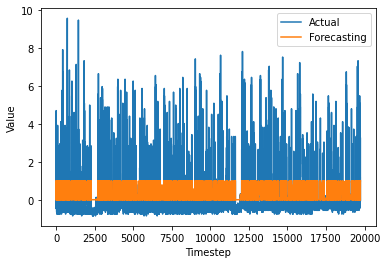

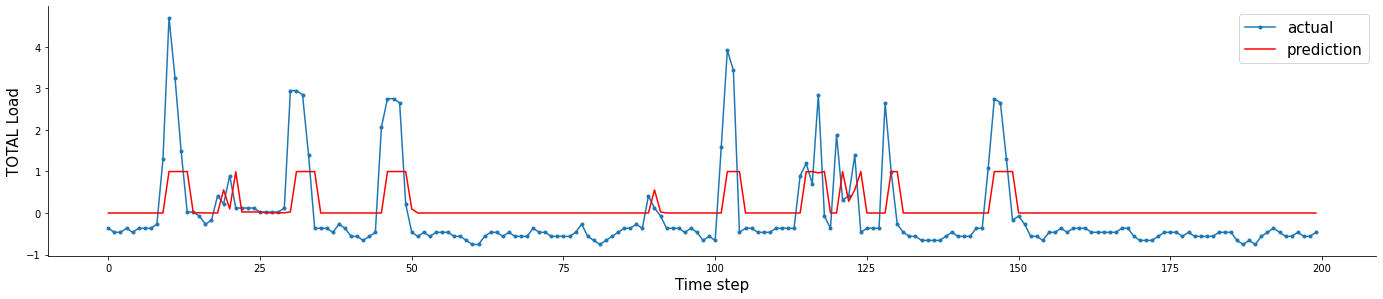

Epoch 1/50
198/198 [==============================] - 16s 22ms/step - loss: 1.0335 - val_loss: 1.0002
Epoch 2/50
198/198 [==============================] - 2s 12ms/step - loss: 0.9980 - val_loss: 0.9945
Epoch 3/50
198/198 [==============================] - 2s 11ms/step - loss: 0.9923 - val_loss: 0.9858
Epoch 4/50
198/198 [==============================] - 2s 11ms/step - loss: 0.9784 - val_loss: 0.9639
Epoch 5/50
198/198 [==============================] - 3s 14ms/step - loss: 0.9516 - val_loss: 0.9253
Epoch 6/50
198/198 [==============================] - 3s 14ms/step - loss: 0.9096 - val_loss: 0.8718
Epoch 7/50
198/198 [==============================] - 2s 12ms/step - loss: 0.8604 - val_loss: 0.8166
Epoch 8/50
198/198 [==============================] - 2s 13ms/step - loss: 0.8101 - val_loss: 0.7682
Epoch 9/50
198/198 [==============================] - 2s 13ms/step - loss: 0.7679 - val_loss: 0.7351
Epoch 10/50
198/198 [==============================] - 3s 17ms/step - loss: 0.7365 - val_l

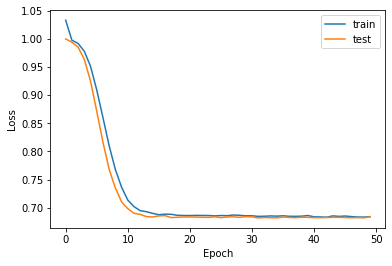

==============minmax===================
MAPE test is : 1.29640
MAPE test invert is : 0.76137
==============zscore===================
MAPE test is : 1088.62031
MAPE test invert is : 0.46192
RMSE Testing is : 0.827
RMSE Testing invert is : 84.785
R2 test is : 0.31612


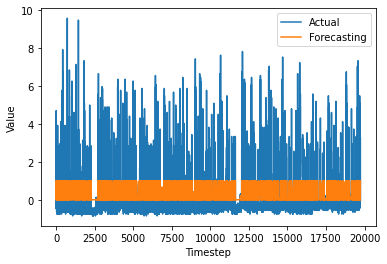

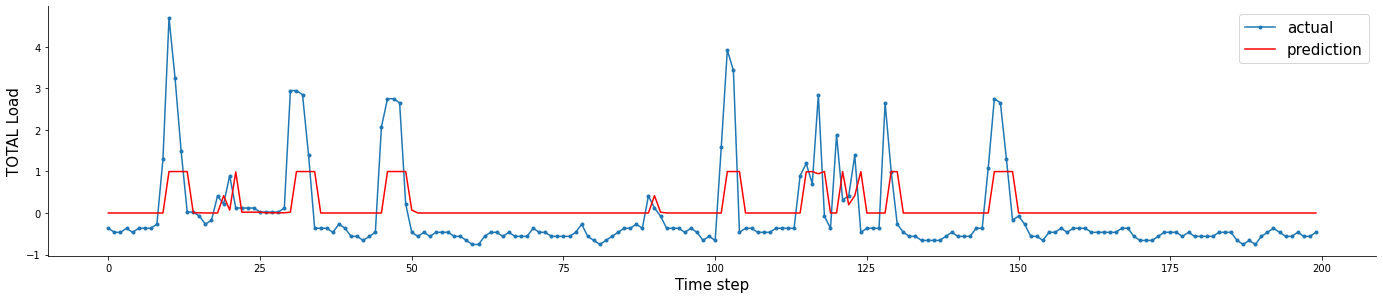

Epoch 1/50
198/198 [==============================] - 14s 16ms/step - loss: 1.0337 - val_loss: 1.0011
Epoch 2/50
198/198 [==============================] - 2s 12ms/step - loss: 0.9987 - val_loss: 0.9953
Epoch 3/50
198/198 [==============================] - 3s 17ms/step - loss: 0.9921 - val_loss: 0.9876
Epoch 4/50
198/198 [==============================] - 2s 12ms/step - loss: 0.9821 - val_loss: 0.9693
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 0.9586 - val_loss: 0.9361
Epoch 6/50
198/198 [==============================] - 2s 11ms/step - loss: 0.9230 - val_loss: 0.8912
Epoch 7/50
198/198 [==============================] - 2s 10ms/step - loss: 0.8831 - val_loss: 0.8453
Epoch 8/50
198/198 [==============================] - 3s 13ms/step - loss: 0.8385 - val_loss: 0.8014
Epoch 9/50
198/198 [==============================] - 3s 14ms/step - loss: 0.8005 - val_loss: 0.7651
Epoch 10/50
198/198 [==============================] - 2s 11ms/step - loss: 0.7671 - val_l

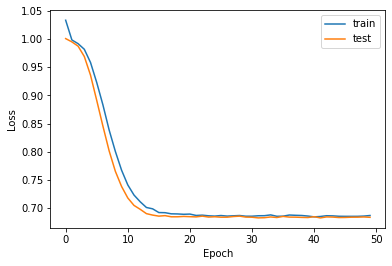

==============minmax===================
MAPE test is : 1.32396
MAPE test invert is : 0.76364
==============zscore===================
MAPE test is : 897.41580
MAPE test invert is : 0.46171
RMSE Testing is : 0.827
RMSE Testing invert is : 84.748
R2 test is : 0.31671


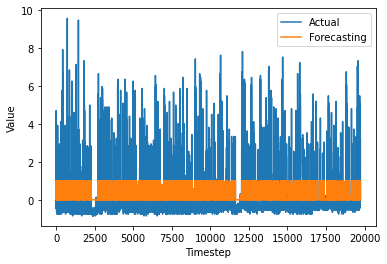

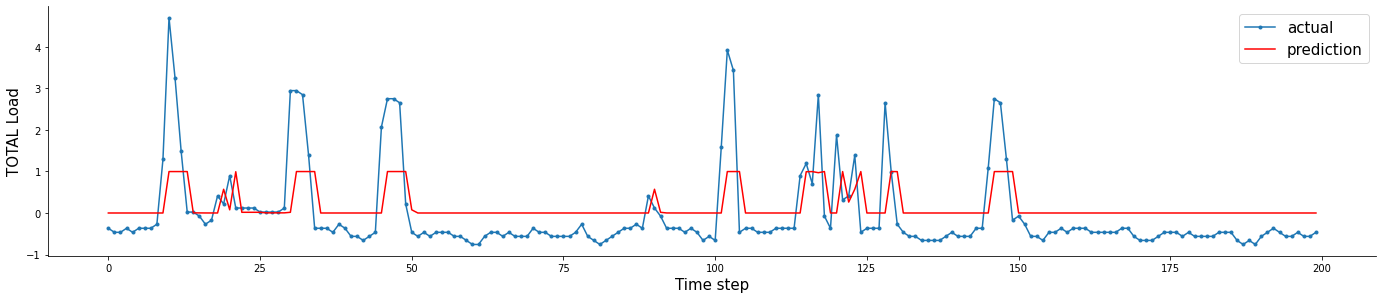

Epoch 1/50
198/198 [==============================] - 15s 20ms/step - loss: 1.0829 - val_loss: 1.0001
Epoch 2/50
198/198 [==============================] - 3s 17ms/step - loss: 0.9965 - val_loss: 0.9894
Epoch 3/50
198/198 [==============================] - 3s 15ms/step - loss: 0.9852 - val_loss: 0.9723
Epoch 4/50
198/198 [==============================] - 3s 15ms/step - loss: 0.9613 - val_loss: 0.9339
Epoch 5/50
198/198 [==============================] - 3s 14ms/step - loss: 0.9205 - val_loss: 0.8790
Epoch 6/50
198/198 [==============================] - 3s 14ms/step - loss: 0.8708 - val_loss: 0.8256
Epoch 7/50
198/198 [==============================] - 3s 18ms/step - loss: 0.8259 - val_loss: 0.7822
Epoch 8/50
198/198 [==============================] - 3s 14ms/step - loss: 0.7894 - val_loss: 0.7500
Epoch 9/50
198/198 [==============================] - 3s 13ms/step - loss: 0.7583 - val_loss: 0.7287
Epoch 10/50
198/198 [==============================] - 2s 13ms/step - loss: 0.7361 - val_l

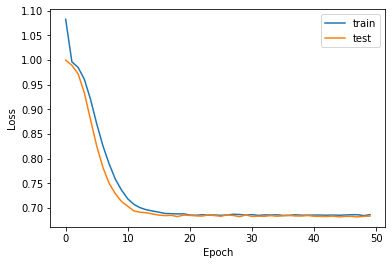

==============minmax===================
MAPE test is : 1.31850
MAPE test invert is : 0.76323
==============zscore===================
MAPE test is : 978.08964
MAPE test invert is : 0.46172
RMSE Testing is : 0.827
RMSE Testing invert is : 84.759
R2 test is : 0.31654


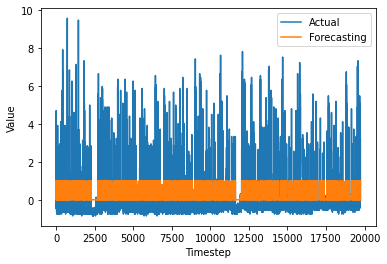

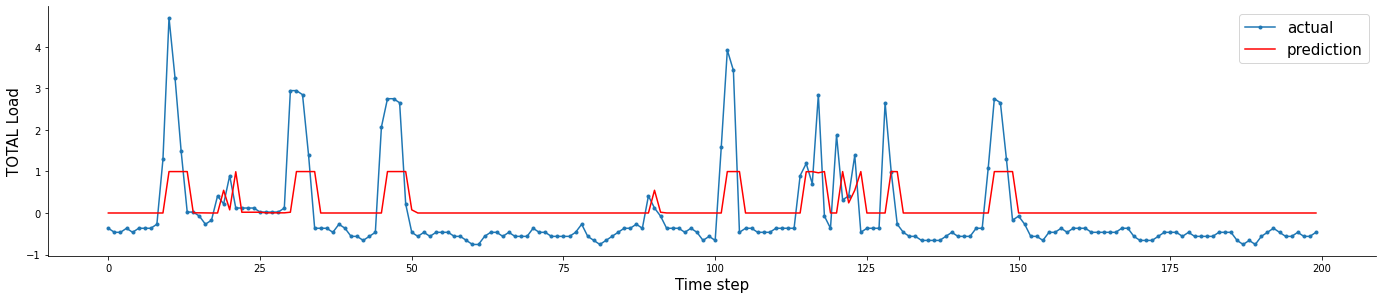

Epoch 1/50
198/198 [==============================] - 15s 17ms/step - loss: 1.0555 - val_loss: 1.0016
Epoch 2/50
198/198 [==============================] - 2s 12ms/step - loss: 0.9990 - val_loss: 0.9942
Epoch 3/50
198/198 [==============================] - 2s 11ms/step - loss: 0.9921 - val_loss: 0.9849
Epoch 4/50
198/198 [==============================] - 3s 16ms/step - loss: 0.9780 - val_loss: 0.9618
Epoch 5/50
198/198 [==============================] - 3s 13ms/step - loss: 0.9489 - val_loss: 0.9204
Epoch 6/50
198/198 [==============================] - 3s 13ms/step - loss: 0.9087 - val_loss: 0.8671
Epoch 7/50
198/198 [==============================] - 2s 12ms/step - loss: 0.8596 - val_loss: 0.8146
Epoch 8/50
198/198 [==============================] - 3s 13ms/step - loss: 0.8136 - val_loss: 0.7712
Epoch 9/50
198/198 [==============================] - 3s 17ms/step - loss: 0.7746 - val_loss: 0.7392
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.7443 - val_l

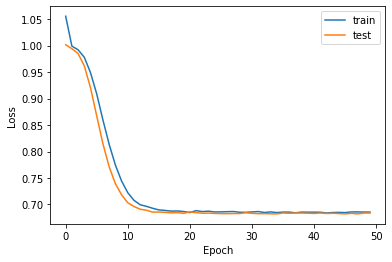

==============minmax===================
MAPE test is : 1.31449
MAPE test invert is : 0.76284
==============zscore===================
MAPE test is : 996.22608
MAPE test invert is : 0.46217
RMSE Testing is : 0.827
RMSE Testing invert is : 84.779
R2 test is : 0.31621


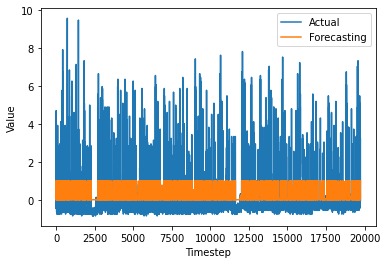

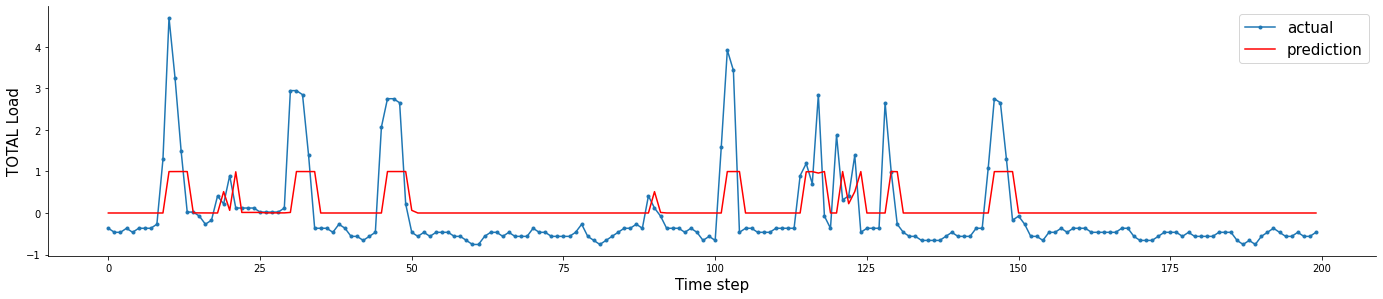

0                   1                   2  \
0  1,3215548290327632   1,296404019098261  1,3239617577453637   
1  0,7631297818203182  0,7613747593177648   0,763639771668516   
2   953,5049793162394  1088,6203140233686   897,4157980983967   
3  0,4608812272424577  0,4619186294160114  0,4617088438620942   
4  0.8262332370079534  0.8269863444450637  0.8266321247346149   
5   84,70732598181432   84,78453628311574    84,7482208661872   
6  0,3173685531814223  0,3161235557792669  0,3167092743665293   
7                 155                 154                 133   

                     3                   4           nama  
0   1,3184957294037478  1,3144871968600182        mminmax  
1   0,7632271394313433  0,7628386310304404  minmax invert  
2    978,0896365604585   996,2260814515672         zscore  
3  0,46171576939564096  0,4621742615326845  zscpre invert  
4   0.8267371585351092  0.8269336413269806           rmse  
5     84,7589891722527   84,77913303860345    rmse invert  
6  0,31653562231708143  0,3162107186998161             r2  
7                  214                 154          waktu

In [24]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto4
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')




  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto4") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto4")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto4")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

# 5 run random

## tanh zscore

Epoch 1/80
20/20 [==============================] - 38s 232ms/step - loss: 1.2294 - val_loss: 1.2035
Epoch 2/80
20/20 [==============================] - 3s 155ms/step - loss: 1.1534 - val_loss: 1.0607
Epoch 3/80
20/20 [==============================] - 2s 89ms/step - loss: 0.9842 - val_loss: 0.9193
Epoch 4/80
20/20 [==============================] - 2s 88ms/step - loss: 0.8797 - val_loss: 0.8322
Epoch 5/80
20/20 [==============================] - 2s 89ms/step - loss: 0.8094 - val_loss: 0.7783
Epoch 6/80
20/20 [==============================] - 2s 87ms/step - loss: 0.7575 - val_loss: 0.7325
Epoch 7/80
20/20 [==============================] - 2s 90ms/step - loss: 0.7237 - val_loss: 0.7135
Epoch 8/80
20/20 [==============================] - 3s 134ms/step - loss: 0.7111 - val_loss: 0.7037
Epoch 9/80
20/20 [==============================] - 2s 107ms/step - loss: 0.7019 - val_loss: 0.6977
Epoch 10/80
20/20 [==============================] - 2s 92ms/step - loss: 0.6971 - val_loss: 0.6930
Epoc

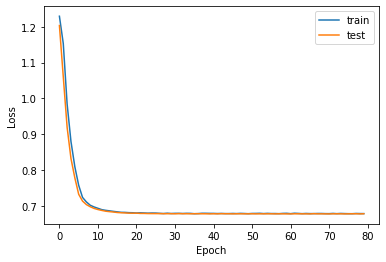

==============minmax===================
MAPE test is : 1.46602
MAPE test invert is : 0.76671
==============zscore===================
MAPE test is : 358705.33963
MAPE test invert is : 0.45853
RMSE Testing is : 0.823
RMSE Testing invert is : 84.426
R2 test is : 0.32189


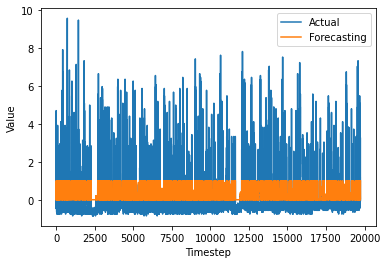

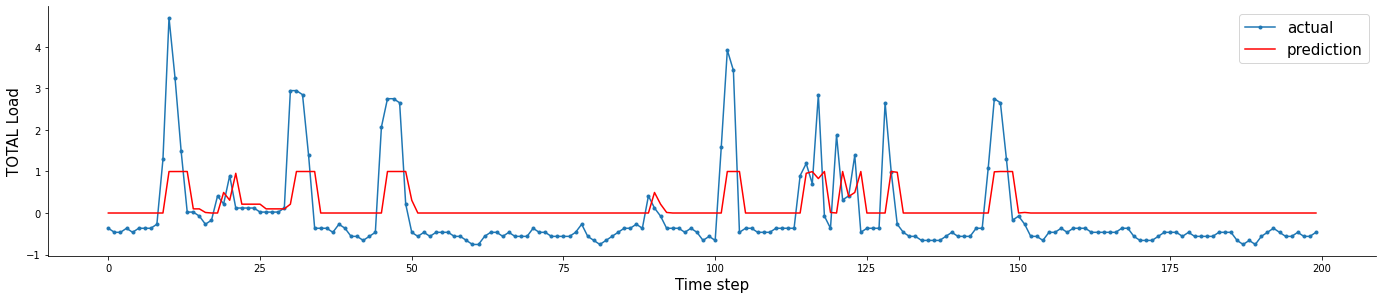

Epoch 1/80
20/20 [==============================] - 36s 231ms/step - loss: 1.2324 - val_loss: 1.2101
Epoch 2/80
20/20 [==============================] - 2s 87ms/step - loss: 1.1642 - val_loss: 1.0736
Epoch 3/80
20/20 [==============================] - 2s 90ms/step - loss: 0.9847 - val_loss: 0.9098
Epoch 4/80
20/20 [==============================] - 2s 115ms/step - loss: 0.8714 - val_loss: 0.8269
Epoch 5/80
20/20 [==============================] - 3s 125ms/step - loss: 0.8062 - val_loss: 0.7777
Epoch 6/80
20/20 [==============================] - 2s 87ms/step - loss: 0.7586 - val_loss: 0.7366
Epoch 7/80
20/20 [==============================] - 2s 89ms/step - loss: 0.7288 - val_loss: 0.7189
Epoch 8/80
20/20 [==============================] - 2s 90ms/step - loss: 0.7152 - val_loss: 0.7083
Epoch 9/80
20/20 [==============================] - 2s 89ms/step - loss: 0.7063 - val_loss: 0.7012
Epoch 10/80
20/20 [==============================] - 2s 106ms/step - loss: 0.7000 - val_loss: 0.6960
Epoc

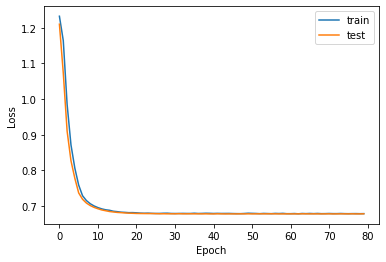

==============minmax===================
MAPE test is : 1.47140
MAPE test invert is : 0.76701
==============zscore===================
MAPE test is : 294142.79758
MAPE test invert is : 0.45858
RMSE Testing is : 0.823
RMSE Testing invert is : 84.420
R2 test is : 0.32200


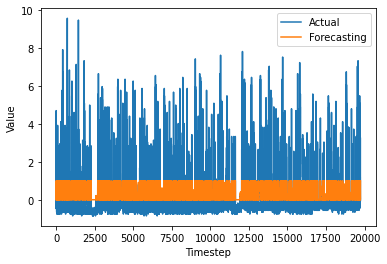

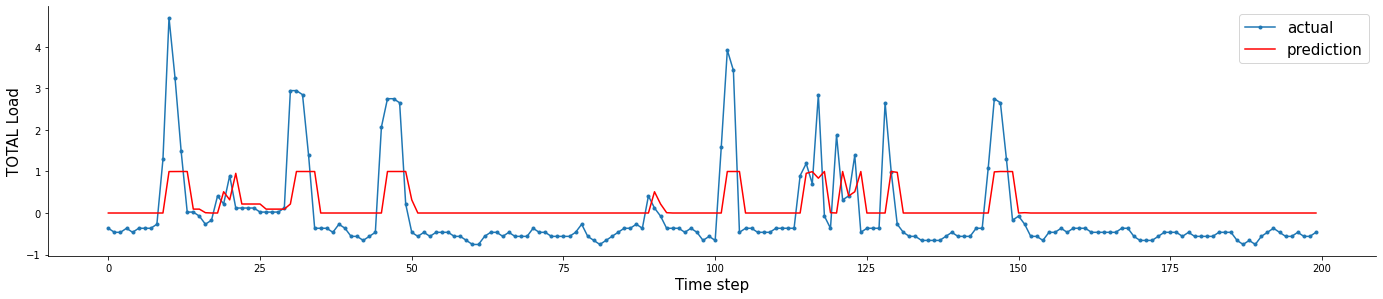

Epoch 1/80
20/20 [==============================] - 39s 287ms/step - loss: 1.2324 - val_loss: 1.2103
Epoch 2/80
20/20 [==============================] - 2s 92ms/step - loss: 1.1654 - val_loss: 1.0760
Epoch 3/80
20/20 [==============================] - 2s 91ms/step - loss: 0.9843 - val_loss: 0.9082
Epoch 4/80
20/20 [==============================] - 2s 93ms/step - loss: 0.8716 - val_loss: 0.8280
Epoch 5/80
20/20 [==============================] - 2s 91ms/step - loss: 0.8075 - val_loss: 0.7796
Epoch 6/80
20/20 [==============================] - 3s 139ms/step - loss: 0.7597 - val_loss: 0.7374
Epoch 7/80
20/20 [==============================] - 2s 104ms/step - loss: 0.7295 - val_loss: 0.7189
Epoch 8/80
20/20 [==============================] - 2s 92ms/step - loss: 0.7156 - val_loss: 0.7081
Epoch 9/80
20/20 [==============================] - 2s 91ms/step - loss: 0.7055 - val_loss: 0.7008
Epoch 10/80
20/20 [==============================] - 2s 91ms/step - loss: 0.6993 - val_loss: 0.6953
Epoch

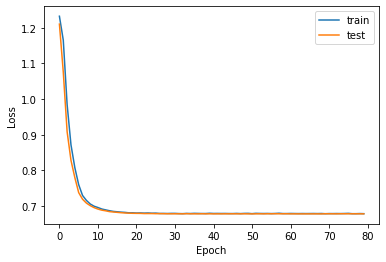

==============minmax===================
MAPE test is : 1.50874
MAPE test invert is : 0.76928
==============zscore===================
MAPE test is : 315931.94151
MAPE test invert is : 0.45911
RMSE Testing is : 0.823
RMSE Testing invert is : 84.408
R2 test is : 0.32219


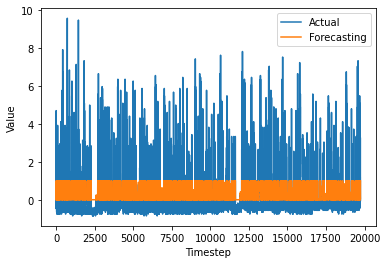

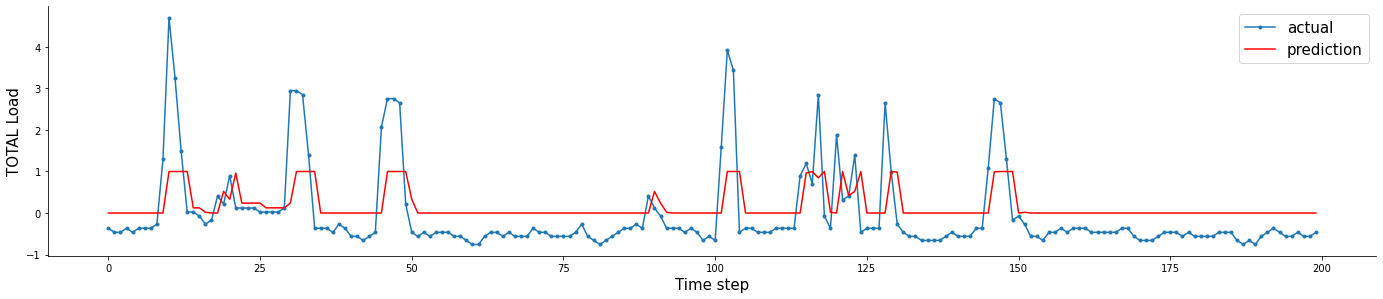

Epoch 1/80
20/20 [==============================] - 37s 238ms/step - loss: 1.2320 - val_loss: 1.2096
Epoch 2/80
20/20 [==============================] - 2s 93ms/step - loss: 1.1673 - val_loss: 1.0876
Epoch 3/80
20/20 [==============================] - 2s 116ms/step - loss: 0.9980 - val_loss: 0.9236
Epoch 4/80
20/20 [==============================] - 3s 133ms/step - loss: 0.8845 - val_loss: 0.8369
Epoch 5/80
20/20 [==============================] - 2s 93ms/step - loss: 0.8155 - val_loss: 0.7871
Epoch 6/80
20/20 [==============================] - 2s 94ms/step - loss: 0.7665 - val_loss: 0.7417
Epoch 7/80
20/20 [==============================] - 3s 140ms/step - loss: 0.7326 - val_loss: 0.7204
Epoch 8/80
20/20 [==============================] - 2s 110ms/step - loss: 0.7159 - val_loss: 0.7086
Epoch 9/80
20/20 [==============================] - 3s 160ms/step - loss: 0.7067 - val_loss: 0.7012
Epoch 10/80
20/20 [==============================] - 2s 95ms/step - loss: 0.7004 - val_loss: 0.6960
Ep

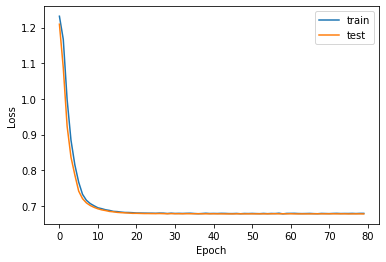

==============minmax===================
MAPE test is : 1.49834
MAPE test invert is : 0.76924
==============zscore===================
MAPE test is : 300639.89549
MAPE test invert is : 0.45877
RMSE Testing is : 0.823
RMSE Testing invert is : 84.395
R2 test is : 0.32239


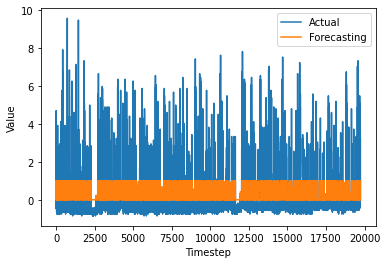

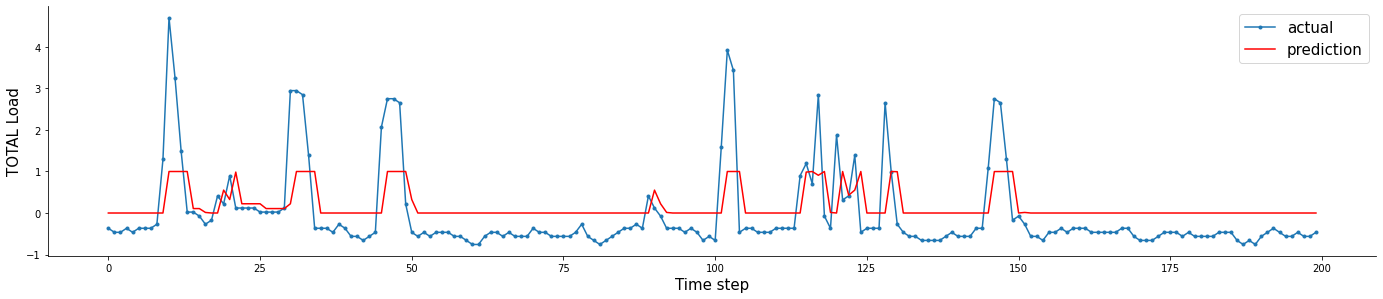

Epoch 1/80
20/20 [==============================] - 38s 242ms/step - loss: 1.2315 - val_loss: 1.2075
Epoch 2/80
20/20 [==============================] - 2s 96ms/step - loss: 1.1552 - val_loss: 1.0494
Epoch 3/80
20/20 [==============================] - 3s 165ms/step - loss: 0.9612 - val_loss: 0.8884
Epoch 4/80
20/20 [==============================] - 2s 96ms/step - loss: 0.8545 - val_loss: 0.8161
Epoch 5/80
20/20 [==============================] - 2s 97ms/step - loss: 0.7967 - val_loss: 0.7691
Epoch 6/80
20/20 [==============================] - 2s 97ms/step - loss: 0.7510 - val_loss: 0.7314
Epoch 7/80
20/20 [==============================] - 2s 96ms/step - loss: 0.7249 - val_loss: 0.7155
Epoch 8/80
20/20 [==============================] - 2s 98ms/step - loss: 0.7127 - val_loss: 0.7060
Epoch 9/80
20/20 [==============================] - 3s 161ms/step - loss: 0.7036 - val_loss: 0.6993
Epoch 10/80
20/20 [==============================] - 3s 162ms/step - loss: 0.6985 - val_loss: 0.6946
Epoc

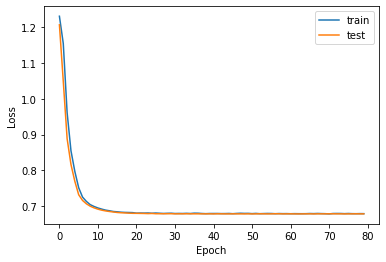

==============minmax===================
MAPE test is : 1.47852
MAPE test invert is : 0.76764
==============zscore===================
MAPE test is : 247214.52098
MAPE test invert is : 0.45852
RMSE Testing is : 0.823
RMSE Testing invert is : 84.409
R2 test is : 0.32216


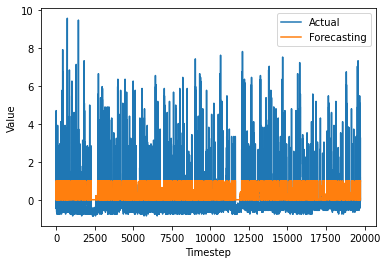

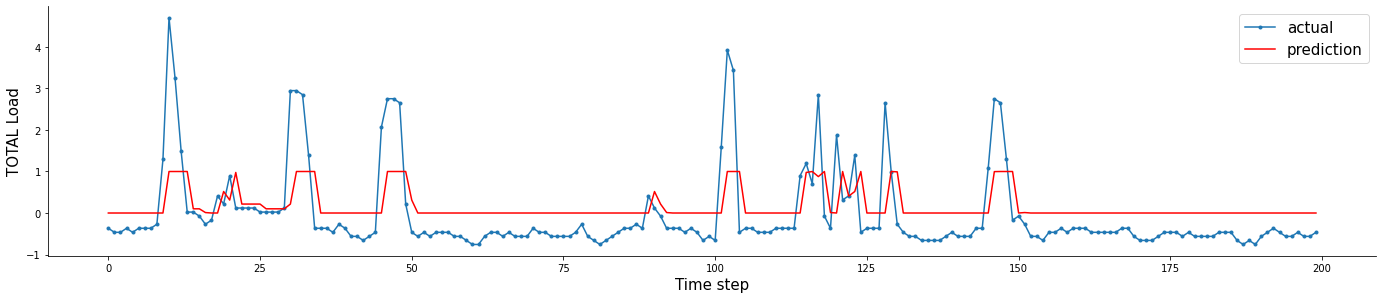

0                    1                    2  \
0   1,4660158916620583   1,4714021714097445   1,5087447790340744   
1   0,7667103350083195    0,767008419974435   0,7692793577903932   
2     358705,339633333    294142,7975768592   315931,94150955405   
3  0,45852861022944225   0,4585794468753879   0,4591070859162191   
4   0.8234931044968656   0.8234269844481209   0.8233099210124201   
5    84,42640131375012    84,41962253474185    84,40762092289147   
6  0,32188882387129425  0,32199771353595685  0,32219047776825316   
7                  235                  234                  199   

                     3                   4           nama  
0   1,4983351718945068  1,4785179611034407        mminmax  
1   0,7692407416443902  0,7676415268174749  minmax invert  
2   300639,89549175696  247214,52097864848         zscore  
3  0,45876685773069353  0,4585156756474843  zscpre invert  
4   0.8231901747108439  0.8233276141797097           rmse  
5    84,39534425747982   84,40943486697181    rmse invert  
6  0,32238763142534976  0,3221613448115781             r2  
7                  205                 236          waktu

In [25]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto5
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network LSTM
  model = Sequential()
  model.add(LSTM(38, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=80, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start
  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto5") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto5")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto5")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## tanh minmax

Epoch 1/80
20/20 [==============================] - 45s 584ms/step - loss: 0.1669 - val_loss: 0.1446
Epoch 2/80
20/20 [==============================] - 2s 95ms/step - loss: 0.1048 - val_loss: 0.0434
Epoch 3/80
20/20 [==============================] - 3s 155ms/step - loss: 0.0187 - val_loss: 0.0093
Epoch 4/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0102 - val_loss: 0.0093
Epoch 5/80
20/20 [==============================] - 2s 92ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 6/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 7/80
20/20 [==============================] - 2s 93ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 8/80
20/20 [==============================] - 2s 93ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 9/80
20/20 [==============================] - 3s 160ms/step - loss: 0.0097 - val_loss: 0.0089
Epoch 10/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0095 - val_loss: 0.0087
Epoch

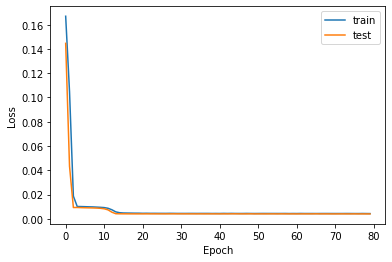

==============minmax===================
MAPE test is : 77530454167.27577
MAPE test invert is : 0.29826
==============zscore===================
MAPE test is : 0.31121
MAPE test invert is : 0.27067
RMSE Testing is : 0.064
RMSE Testing invert is : 68.050
R2 test is : 0.55944


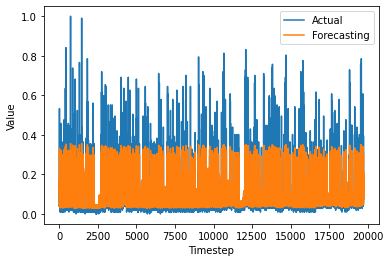

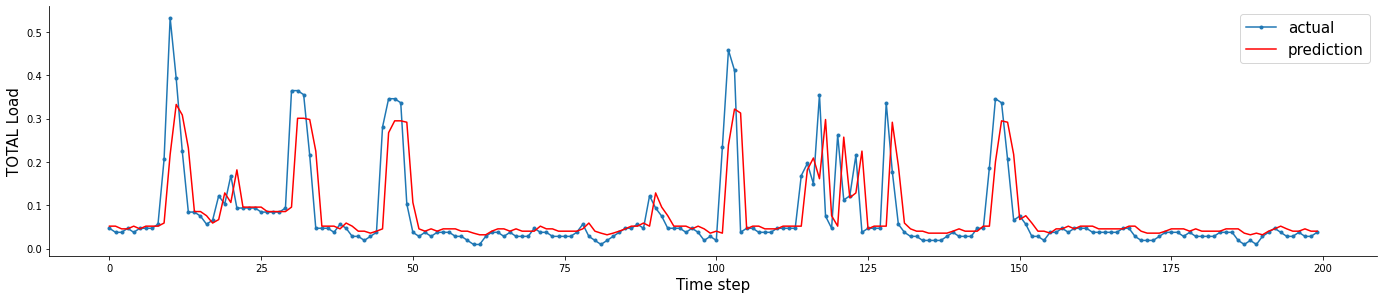

Epoch 1/80
20/20 [==============================] - 37s 231ms/step - loss: 0.1675 - val_loss: 0.1457
Epoch 2/80
20/20 [==============================] - 3s 144ms/step - loss: 0.1060 - val_loss: 0.0434
Epoch 3/80
20/20 [==============================] - 2s 99ms/step - loss: 0.0186 - val_loss: 0.0092
Epoch 4/80
20/20 [==============================] - 2s 91ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 5/80
20/20 [==============================] - 2s 88ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 6/80
20/20 [==============================] - 2s 91ms/step - loss: 0.0099 - val_loss: 0.0089
Epoch 7/80
20/20 [==============================] - 2s 91ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 8/80
20/20 [==============================] - 2s 105ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 9/80
20/20 [==============================] - 3s 135ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 10/80
20/20 [==============================] - 2s 89ms/step - loss: 0.0087 - val_loss: 0.0072
Epoc

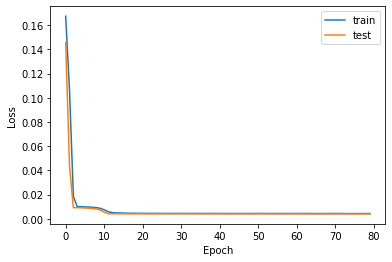

==============minmax===================
MAPE test is : 76409998585.34052
MAPE test invert is : 0.29277
==============zscore===================
MAPE test is : 0.30936
MAPE test invert is : 0.26873
RMSE Testing is : 0.064
RMSE Testing invert is : 68.097
R2 test is : 0.55884


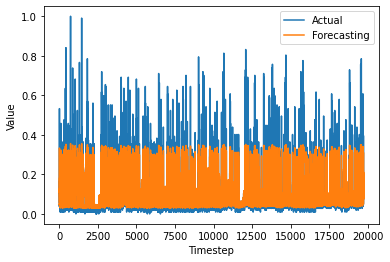

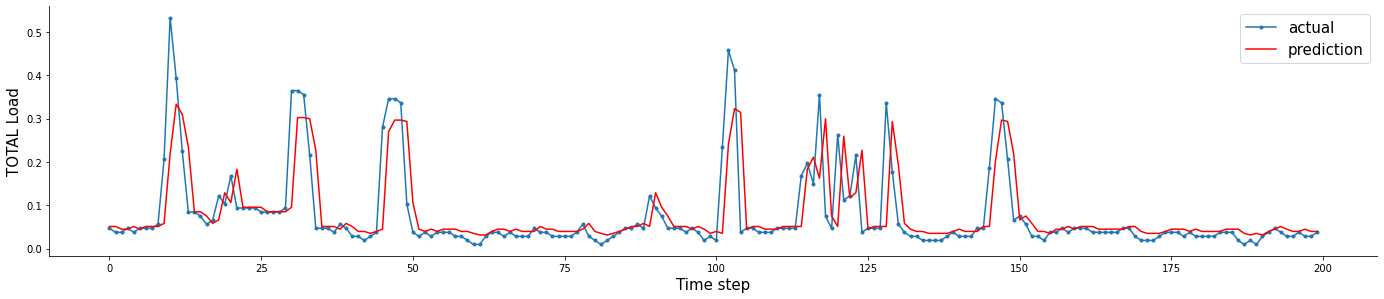

Epoch 1/80
20/20 [==============================] - 38s 239ms/step - loss: 0.1678 - val_loss: 0.1461
Epoch 2/80
20/20 [==============================] - 2s 106ms/step - loss: 0.1053 - val_loss: 0.0409
Epoch 3/80
20/20 [==============================] - 3s 145ms/step - loss: 0.0178 - val_loss: 0.0093
Epoch 4/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 5/80
20/20 [==============================] - 2s 96ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 6/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 7/80
20/20 [==============================] - 2s 96ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 8/80
20/20 [==============================] - 2s 102ms/step - loss: 0.0097 - val_loss: 0.0089
Epoch 9/80
20/20 [==============================] - 3s 150ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 10/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0095 - val_loss: 0.0086
Epo

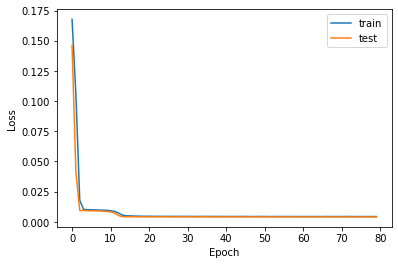

==============minmax===================
MAPE test is : 75483024244.77563
MAPE test invert is : 0.28371
==============zscore===================
MAPE test is : 0.30902
MAPE test invert is : 0.26804
RMSE Testing is : 0.064
RMSE Testing invert is : 68.155
R2 test is : 0.55809


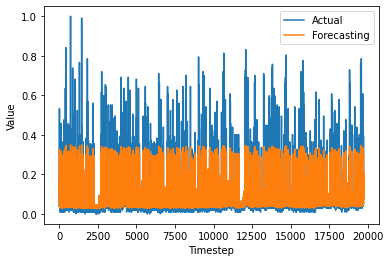

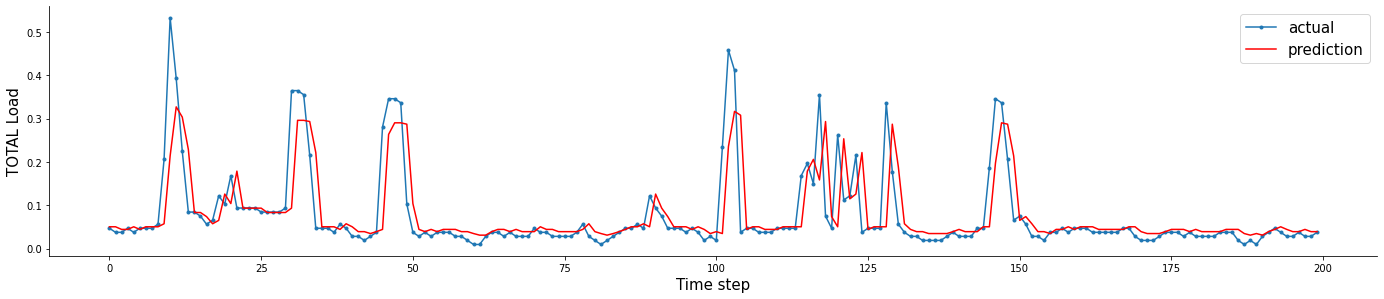

Epoch 1/80
20/20 [==============================] - 37s 236ms/step - loss: 0.1689 - val_loss: 0.1489
Epoch 2/80
20/20 [==============================] - 2s 94ms/step - loss: 0.1117 - val_loss: 0.0501
Epoch 3/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0207 - val_loss: 0.0093
Epoch 4/80
20/20 [==============================] - 2s 107ms/step - loss: 0.0102 - val_loss: 0.0093
Epoch 5/80
20/20 [==============================] - 3s 146ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 6/80
20/20 [==============================] - 2s 96ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 7/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 8/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 9/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 10/80
20/20 [==============================] - 2s 99ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch

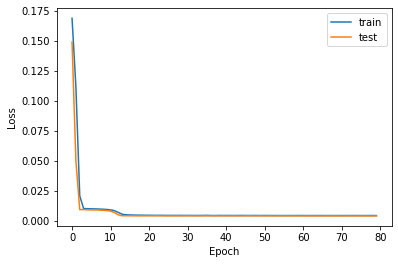

==============minmax===================
MAPE test is : 79110998160.23485
MAPE test invert is : 0.31079
==============zscore===================
MAPE test is : 0.31366
MAPE test invert is : 0.27339
RMSE Testing is : 0.064
RMSE Testing invert is : 68.137
R2 test is : 0.55831


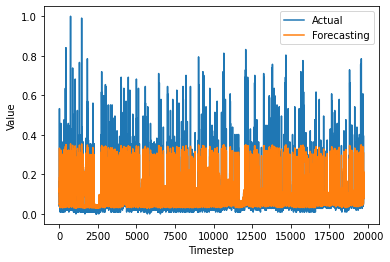

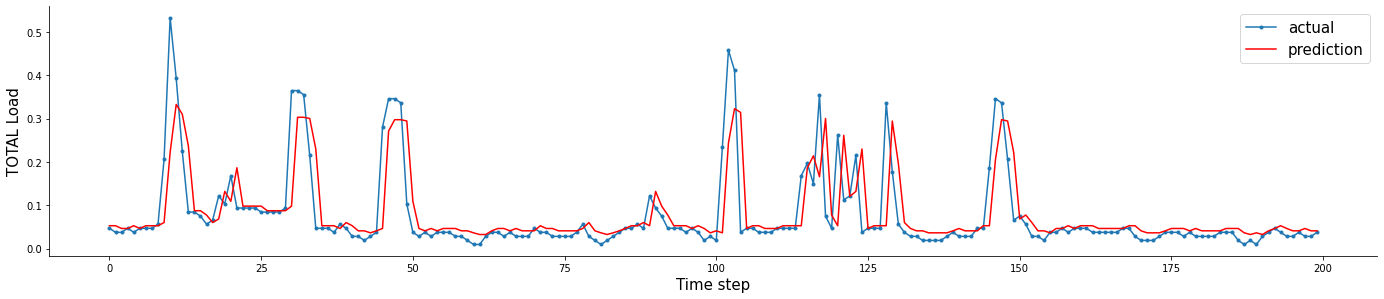

Epoch 1/80
20/20 [==============================] - 41s 302ms/step - loss: 0.1679 - val_loss: 0.1464
Epoch 2/80
20/20 [==============================] - 2s 99ms/step - loss: 0.1063 - val_loss: 0.0435
Epoch 3/80
20/20 [==============================] - 2s 99ms/step - loss: 0.0187 - val_loss: 0.0093
Epoch 4/80
20/20 [==============================] - 2s 98ms/step - loss: 0.0102 - val_loss: 0.0094
Epoch 5/80
20/20 [==============================] - 2s 98ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 6/80
20/20 [==============================] - 2s 116ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 7/80
20/20 [==============================] - 3s 148ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 8/80
20/20 [==============================] - 2s 98ms/step - loss: 0.0097 - val_loss: 0.0089
Epoch 9/80
20/20 [==============================] - 2s 100ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 10/80
20/20 [==============================] - 2s 100ms/step - loss: 0.0094 - val_loss: 0.0086
Epo

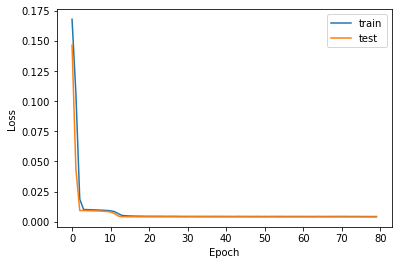

==============minmax===================
MAPE test is : 75091418144.21762
MAPE test invert is : 0.28148
==============zscore===================
MAPE test is : 0.30884
MAPE test invert is : 0.26776
RMSE Testing is : 0.064
RMSE Testing invert is : 68.198
R2 test is : 0.55752


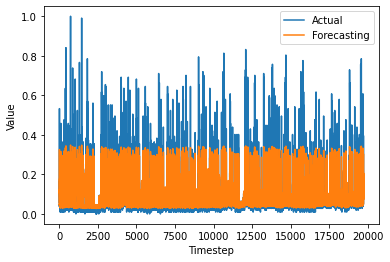

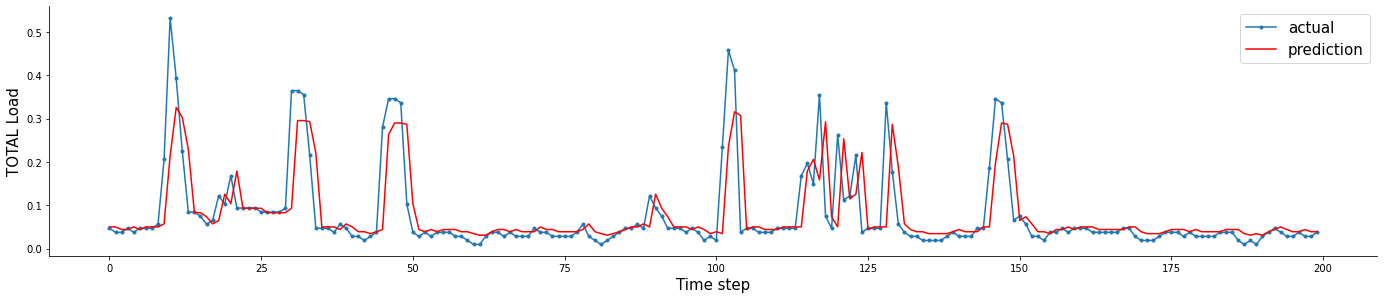

0                    1                    2  \
0    77530454167,27577    76409998585,34052    75483024244,77563   
1   0,2982584617864268  0,29277373707975485    0,283712008322044   
2  0,31120955312604676  0,30936089301365965  0,30902002066678536   
3   0,2706664845228687   0,2687327258173034  0,26804074239543413   
4  0.06359844740128445   0.0636417534953827   0.0636959164751582   
5    68,05033871937435    68,09667624005948    68,15463062841926   
6   0,5594401363983501    0,558839951224144    0,558088723945292   
7                  236                  234                  236   

                     3                    4           nama  
0    79110998160,23485    75091418144,21762        mminmax  
1    0,310789413076665   0,2814843567498567  minmax invert  
2   0,3136588964022465  0,30884279288050986         zscore  
3   0,2733916288250286  0,26775777701402015  zscpre invert  
4  0.06367962611527753  0.06373683753209003           rmse  
5    68,13719994334694    68,19841615933633    rmse invert  
6   0,5583147344512944   0,5575207350914555             r2  
7                  205                  215          waktu

In [46]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto6
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(38, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=80, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start
  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto6") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto6")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto6")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig minmax

Epoch 1/80
20/20 [==============================] - 40s 266ms/step - loss: 0.0749 - val_loss: 0.0425
Epoch 2/80
20/20 [==============================] - 2s 122ms/step - loss: 0.0314 - val_loss: 0.0180
Epoch 3/80
20/20 [==============================] - 2s 91ms/step - loss: 0.0149 - val_loss: 0.0101
Epoch 4/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0104 - val_loss: 0.0092
Epoch 5/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 6/80
20/20 [==============================] - 2s 93ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 7/80
20/20 [==============================] - 2s 110ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 8/80
20/20 [==============================] - 3s 137ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 9/80
20/20 [==============================] - 2s 92ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 10/80
20/20 [==============================] - 2s 92ms/step - loss: 0.0098 - val_loss: 0.0092
Epoc

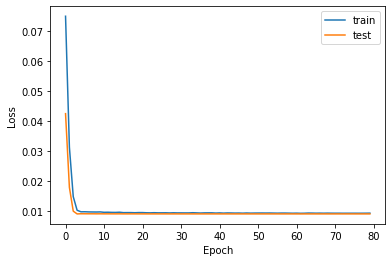

==============minmax===================
MAPE test is : 163120922988.60376
MAPE test invert is : 0.72926
==============zscore===================
MAPE test is : 0.69720
MAPE test invert is : 0.62379
RMSE Testing is : 0.096
RMSE Testing invert is : 102.561
R2 test is : -0.00070


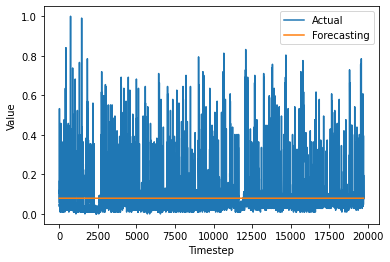

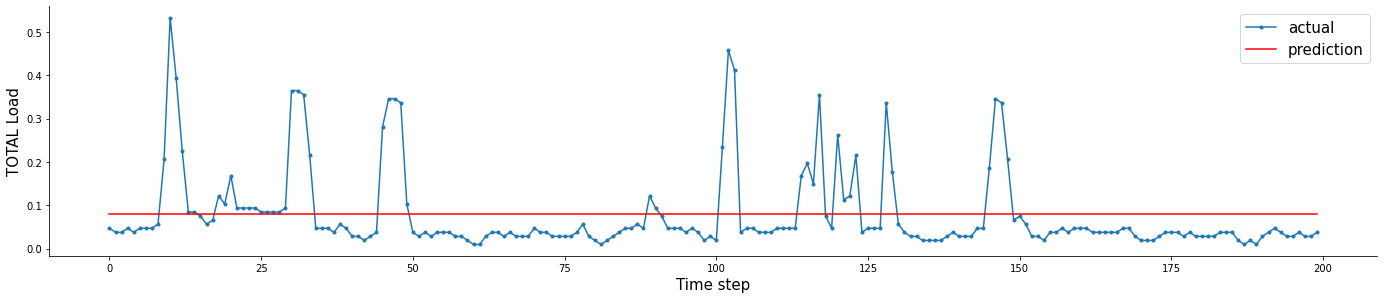

Epoch 1/80
20/20 [==============================] - 43s 312ms/step - loss: 0.1976 - val_loss: 0.1349
Epoch 2/80
20/20 [==============================] - 2s 92ms/step - loss: 0.1007 - val_loss: 0.0620
Epoch 3/80
20/20 [==============================] - 2s 96ms/step - loss: 0.0435 - val_loss: 0.0221
Epoch 4/80
20/20 [==============================] - 2s 93ms/step - loss: 0.0174 - val_loss: 0.0103
Epoch 5/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0110 - val_loss: 0.0092
Epoch 6/80
20/20 [==============================] - 3s 146ms/step - loss: 0.0101 - val_loss: 0.0093
Epoch 7/80
20/20 [==============================] - 2s 103ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 8/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0101 - val_loss: 0.0094
Epoch 9/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 10/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch

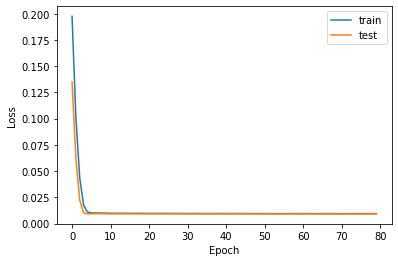

==============minmax===================
MAPE test is : 162397916287.04440
MAPE test invert is : 0.72450
==============zscore===================
MAPE test is : 0.69820
MAPE test invert is : 0.62439
RMSE Testing is : 0.096
RMSE Testing invert is : 102.571
R2 test is : -0.00091


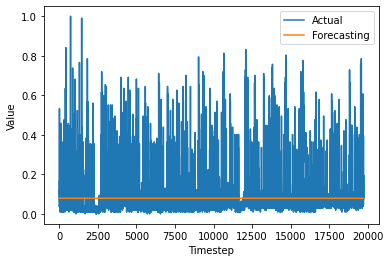

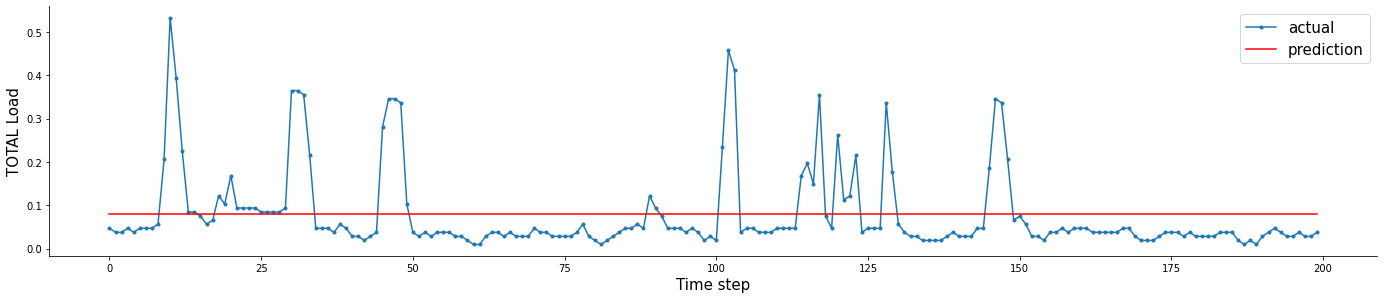

Epoch 1/80
20/20 [==============================] - 38s 240ms/step - loss: 0.0733 - val_loss: 0.0425
Epoch 2/80
20/20 [==============================] - 3s 163ms/step - loss: 0.0318 - val_loss: 0.0186
Epoch 3/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0155 - val_loss: 0.0103
Epoch 4/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0106 - val_loss: 0.0092
Epoch 5/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 6/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 7/80
20/20 [==============================] - 2s 99ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 8/80
20/20 [==============================] - 3s 159ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 9/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 10/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch

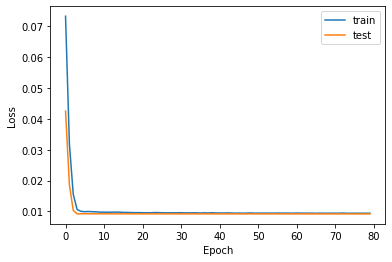

==============minmax===================
MAPE test is : 163623948711.14023
MAPE test invert is : 0.73257
==============zscore===================
MAPE test is : 0.69650
MAPE test invert is : 0.62337
RMSE Testing is : 0.096
RMSE Testing invert is : 102.554
R2 test is : -0.00057


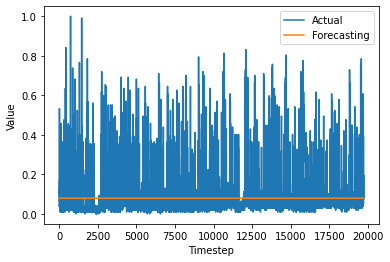

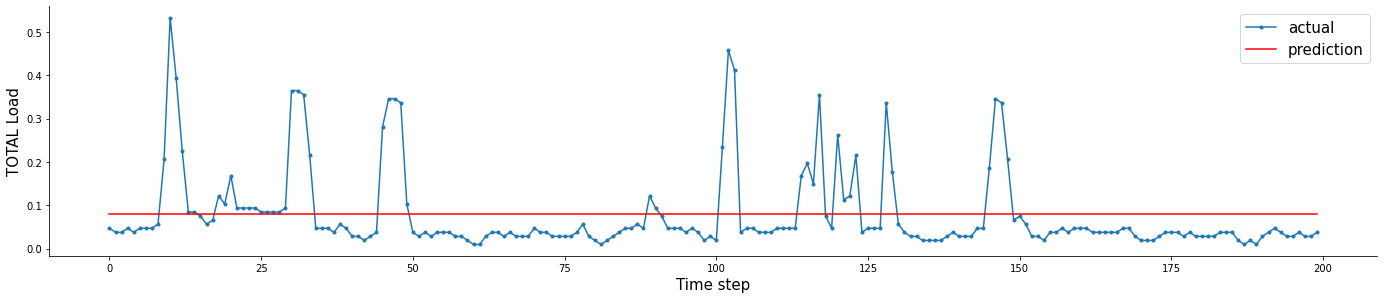

Epoch 1/80
20/20 [==============================] - 38s 235ms/step - loss: 0.0300 - val_loss: 0.0165
Epoch 2/80
20/20 [==============================] - 2s 93ms/step - loss: 0.0143 - val_loss: 0.0102
Epoch 3/80
20/20 [==============================] - 2s 119ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 4/80
20/20 [==============================] - 3s 127ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 5/80
20/20 [==============================] - 2s 93ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 6/80
20/20 [==============================] - 2s 93ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 7/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 8/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 9/80
20/20 [==============================] - 2s 109ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 10/80
20/20 [==============================] - 3s 140ms/step - loss: 0.0097 - val_loss: 0.0092
Epo

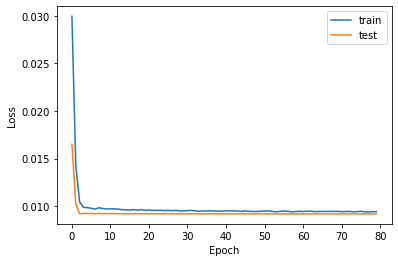

==============minmax===================
MAPE test is : 163897888155.00037
MAPE test invert is : 0.73438
==============zscore===================
MAPE test is : 0.69613
MAPE test invert is : 0.62314
RMSE Testing is : 0.096
RMSE Testing invert is : 102.551
R2 test is : -0.00051


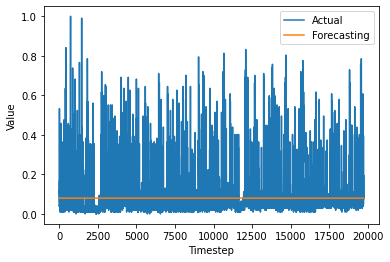

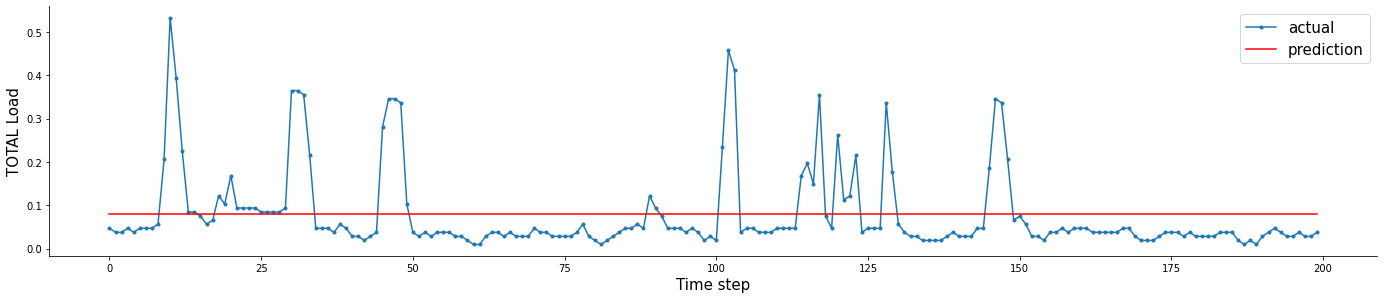

Epoch 1/80
20/20 [==============================] - 36s 257ms/step - loss: 0.0284 - val_loss: 0.0157
Epoch 2/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0136 - val_loss: 0.0100
Epoch 3/80
20/20 [==============================] - 2s 93ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 4/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 5/80
20/20 [==============================] - 3s 155ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 6/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 7/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 8/80
20/20 [==============================] - 2s 99ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 9/80
20/20 [==============================] - 2s 95ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 10/80
20/20 [==============================] - 2s 94ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 

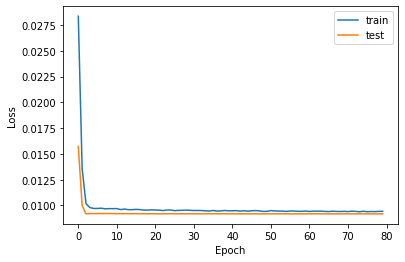

==============minmax===================
MAPE test is : 162647018921.93378
MAPE test invert is : 0.72614
==============zscore===================
MAPE test is : 0.69785
MAPE test invert is : 0.62418
RMSE Testing is : 0.096
RMSE Testing invert is : 102.567
R2 test is : -0.00084


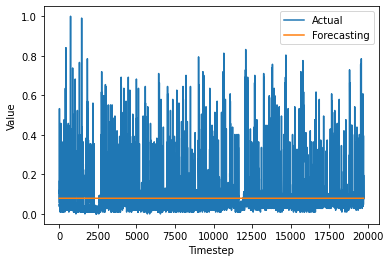

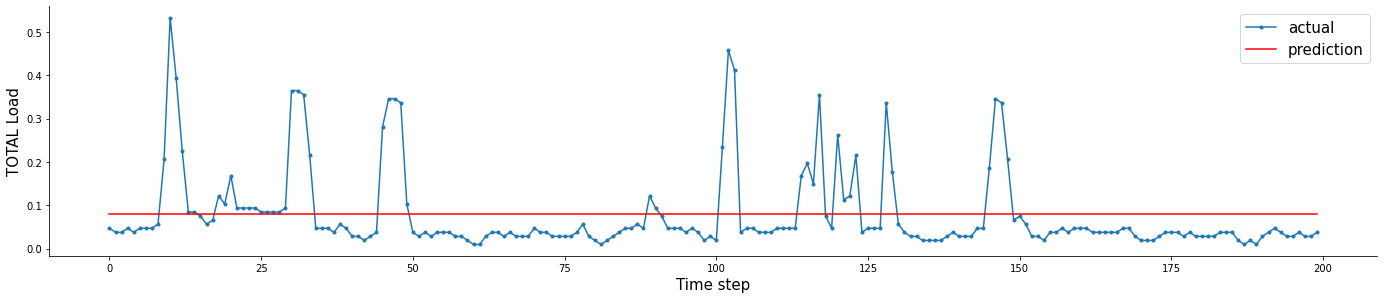

0                       1                       2  \
0      163120922988,60376       162397916287,0444      163623948711,14023   
1      0,7292596217410221      0,7244963193462745      0,7325736485297946   
2      0,6971950538237172      0,6981981867986891      0,6965023599618109   
3       0,623789068578767      0,6243939012203221      0,6233710816869619   
4     0.09585101426574508     0.09586099183729403     0.09584483436435953   
5      102,56058526434722      102,57126126590462       102,5539727698647   
6  -0,0007032898008099142  -0,0009116362313732473  -0,0005742552082637076   
7                     237                     239                     236   

                        3                       4           nama  
0      163897888155,00037      162647018921,93378        mminmax  
1       0,734378412411204      0,7261374538241744  minmax invert  
2      0,6961269186765311      0,6978515653309252         zscore  
3      0,6231444189281609       0,624184972550275  zscpre invert  
4     0.09584173193242368     0.09585740846332026           rmse  
5      102,55065316769333      102,56742705575266    rmse invert  
6  -0,0005094804438539047  -0,0008368075945612841             r2  
7                     236                     201          waktu

In [47]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto7
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(38, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=80, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto7") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto7")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto7")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig zscore

Epoch 1/80
20/20 [==============================] - 38s 294ms/step - loss: 1.2196 - val_loss: 1.1421
Epoch 2/80
20/20 [==============================] - 2s 88ms/step - loss: 1.1045 - val_loss: 1.0611
Epoch 3/80
20/20 [==============================] - 2s 89ms/step - loss: 1.0430 - val_loss: 1.0209
Epoch 4/80
20/20 [==============================] - 3s 155ms/step - loss: 1.0153 - val_loss: 1.0062
Epoch 5/80
20/20 [==============================] - 2s 90ms/step - loss: 1.0054 - val_loss: 1.0021
Epoch 6/80
20/20 [==============================] - 2s 91ms/step - loss: 1.0027 - val_loss: 1.0009
Epoch 7/80
20/20 [==============================] - 2s 90ms/step - loss: 1.0018 - val_loss: 1.0005
Epoch 8/80
20/20 [==============================] - 2s 89ms/step - loss: 1.0006 - val_loss: 1.0004
Epoch 9/80
20/20 [==============================] - 2s 90ms/step - loss: 1.0004 - val_loss: 1.0003
Epoch 10/80
20/20 [==============================] - 2s 124ms/step - loss: 1.0005 - val_loss: 1.0002
Epoch

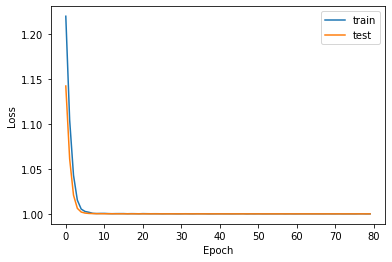

==============minmax===================
MAPE test is : 0.99942
MAPE test invert is : 0.76634
==============zscore===================
MAPE test is : 281.80787
MAPE test invert is : 0.61924
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -0.00000


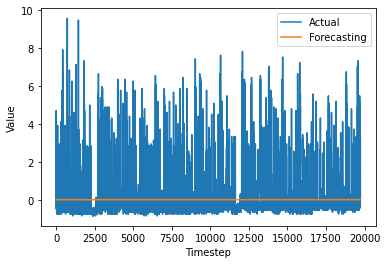

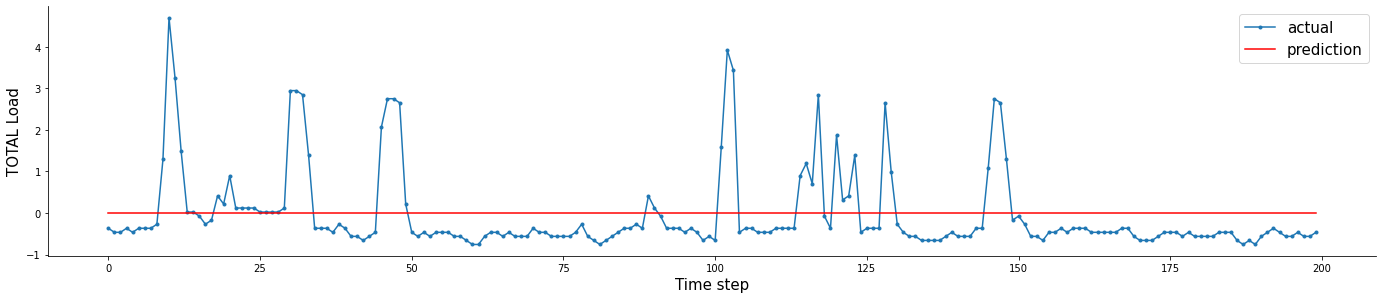

Epoch 1/80
20/20 [==============================] - 40s 243ms/step - loss: 1.1065 - val_loss: 1.0669
Epoch 2/80
20/20 [==============================] - 2s 96ms/step - loss: 1.0504 - val_loss: 1.0307
Epoch 3/80
20/20 [==============================] - 2s 120ms/step - loss: 1.0233 - val_loss: 1.0123
Epoch 4/80
20/20 [==============================] - 3s 129ms/step - loss: 1.0095 - val_loss: 1.0045
Epoch 5/80
20/20 [==============================] - 2s 93ms/step - loss: 1.0039 - val_loss: 1.0017
Epoch 6/80
20/20 [==============================] - 2s 96ms/step - loss: 1.0017 - val_loss: 1.0008
Epoch 7/80
20/20 [==============================] - 2s 100ms/step - loss: 1.0010 - val_loss: 1.0005
Epoch 8/80
20/20 [==============================] - 2s 94ms/step - loss: 1.0009 - val_loss: 1.0003
Epoch 9/80
20/20 [==============================] - 2s 111ms/step - loss: 1.0007 - val_loss: 1.0002
Epoch 10/80
20/20 [==============================] - 3s 138ms/step - loss: 1.0005 - val_loss: 1.0002
Ep

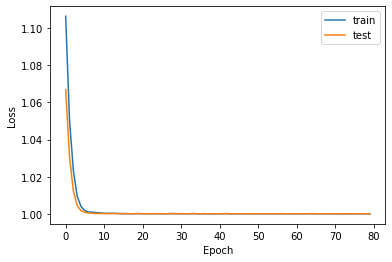

==============minmax===================
MAPE test is : 0.99959
MAPE test invert is : 0.76552
==============zscore===================
MAPE test is : 403.10612
MAPE test invert is : 0.61934
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -0.00000


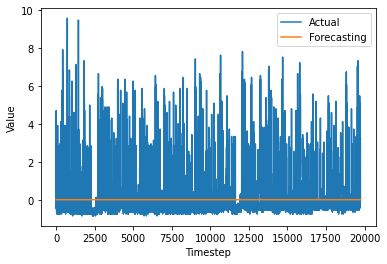

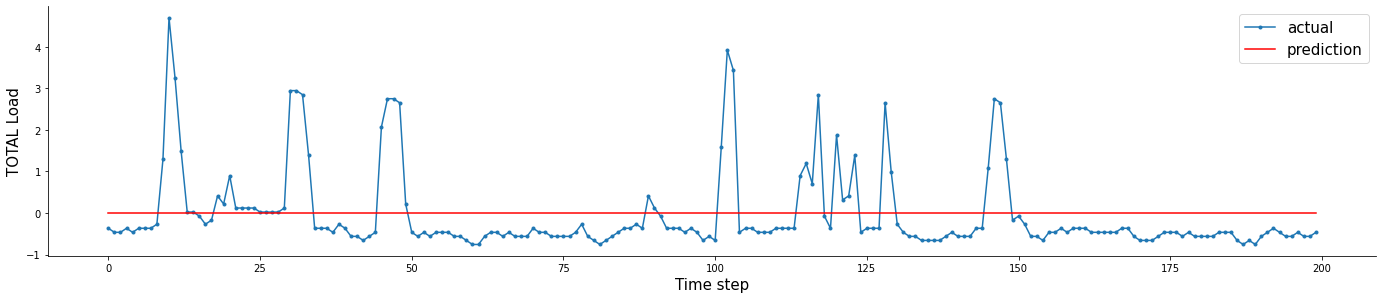

Epoch 1/80
20/20 [==============================] - 37s 242ms/step - loss: 1.0992 - val_loss: 1.0581
Epoch 2/80
20/20 [==============================] - 2s 93ms/step - loss: 1.0431 - val_loss: 1.0246
Epoch 3/80
20/20 [==============================] - 2s 96ms/step - loss: 1.0182 - val_loss: 1.0094
Epoch 4/80
20/20 [==============================] - 3s 156ms/step - loss: 1.0070 - val_loss: 1.0035
Epoch 5/80
20/20 [==============================] - 2s 94ms/step - loss: 1.0029 - val_loss: 1.0014
Epoch 6/80
20/20 [==============================] - 2s 95ms/step - loss: 1.0018 - val_loss: 1.0006
Epoch 7/80
20/20 [==============================] - 2s 94ms/step - loss: 1.0010 - val_loss: 1.0003
Epoch 8/80
20/20 [==============================] - 2s 96ms/step - loss: 1.0003 - val_loss: 1.0002
Epoch 9/80
20/20 [==============================] - 2s 96ms/step - loss: 1.0004 - val_loss: 1.0001
Epoch 10/80
20/20 [==============================] - 3s 149ms/step - loss: 1.0003 - val_loss: 1.0001
Epoch

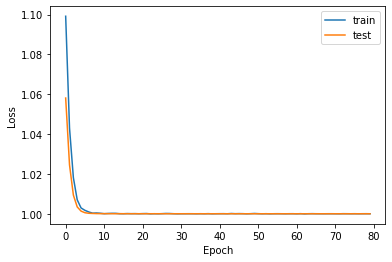

==============minmax===================
MAPE test is : 0.99959
MAPE test invert is : 0.76555
==============zscore===================
MAPE test is : 396.69507
MAPE test invert is : 0.61933
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -0.00000


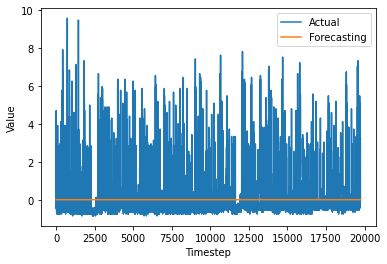

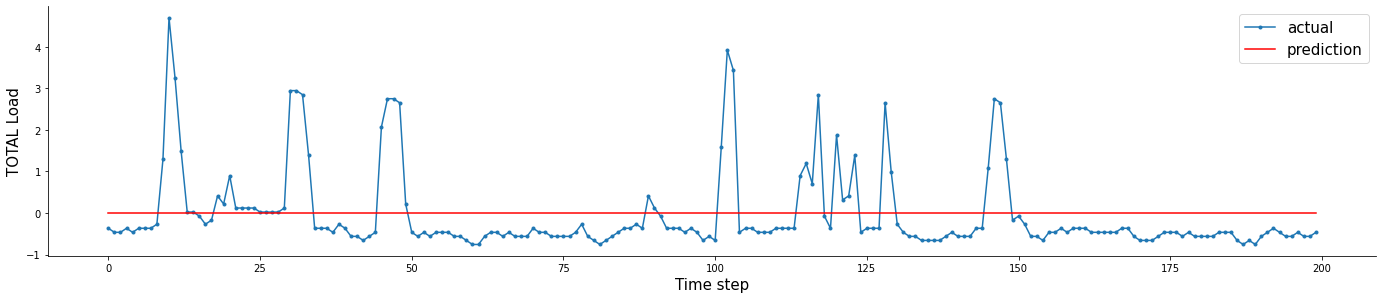

Epoch 1/80
20/20 [==============================] - 40s 305ms/step - loss: 1.2459 - val_loss: 1.1728
Epoch 2/80
20/20 [==============================] - 2s 96ms/step - loss: 1.1315 - val_loss: 1.0857
Epoch 3/80
20/20 [==============================] - 2s 96ms/step - loss: 1.0606 - val_loss: 1.0325
Epoch 4/80
20/20 [==============================] - 2s 97ms/step - loss: 1.0227 - val_loss: 1.0098
Epoch 5/80
20/20 [==============================] - 3s 143ms/step - loss: 1.0086 - val_loss: 1.0038
Epoch 6/80
20/20 [==============================] - 2s 112ms/step - loss: 1.0043 - val_loss: 1.0020
Epoch 7/80
20/20 [==============================] - 2s 97ms/step - loss: 1.0028 - val_loss: 1.0013
Epoch 8/80
20/20 [==============================] - 2s 98ms/step - loss: 1.0016 - val_loss: 1.0009
Epoch 9/80
20/20 [==============================] - 2s 98ms/step - loss: 1.0016 - val_loss: 1.0007
Epoch 10/80
20/20 [==============================] - 2s 97ms/step - loss: 1.0007 - val_loss: 1.0006
Epoch

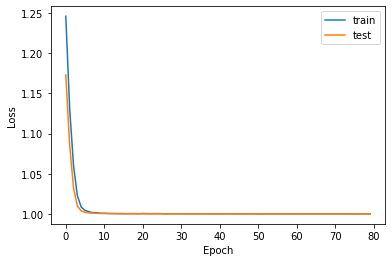

==============minmax===================
MAPE test is : 0.99934
MAPE test invert is : 0.76673
==============zscore===================
MAPE test is : 246.52667
MAPE test invert is : 0.61919
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -0.00001


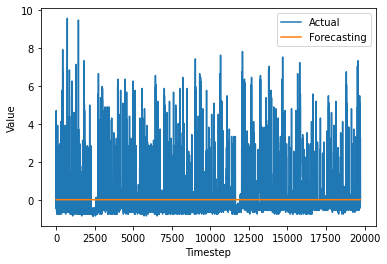

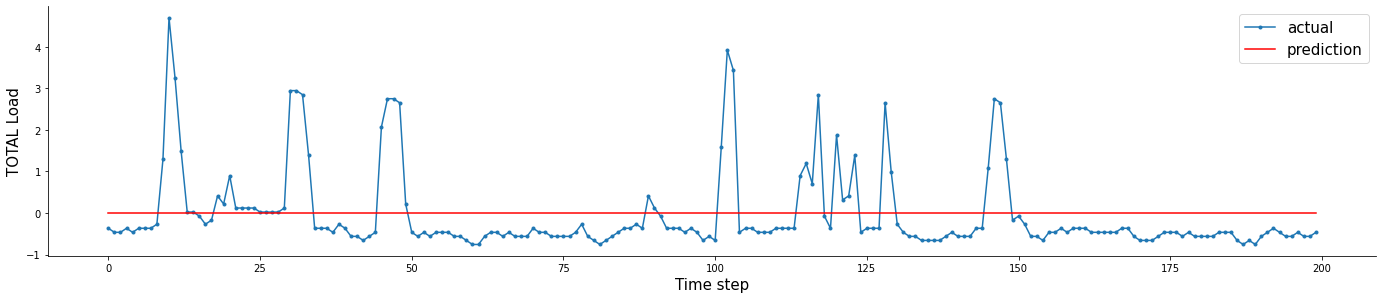

Epoch 1/80
20/20 [==============================] - 38s 240ms/step - loss: 1.1624 - val_loss: 1.1090
Epoch 2/80
20/20 [==============================] - 3s 162ms/step - loss: 1.0826 - val_loss: 1.0521
Epoch 3/80
20/20 [==============================] - 2s 99ms/step - loss: 1.0380 - val_loss: 1.0206
Epoch 4/80
20/20 [==============================] - 2s 97ms/step - loss: 1.0154 - val_loss: 1.0069
Epoch 5/80
20/20 [==============================] - 2s 97ms/step - loss: 1.0060 - val_loss: 1.0024
Epoch 6/80
20/20 [==============================] - 2s 99ms/step - loss: 1.0025 - val_loss: 1.0011
Epoch 7/80
20/20 [==============================] - 2s 96ms/step - loss: 1.0011 - val_loss: 1.0007
Epoch 8/80
20/20 [==============================] - 3s 162ms/step - loss: 1.0009 - val_loss: 1.0005
Epoch 9/80
20/20 [==============================] - 2s 95ms/step - loss: 1.0007 - val_loss: 1.0003
Epoch 10/80
20/20 [==============================] - 2s 97ms/step - loss: 1.0006 - val_loss: 1.0003
Epoch

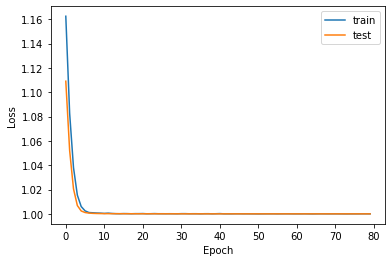

==============minmax===================
MAPE test is : 0.99946
MAPE test invert is : 0.76614
==============zscore===================
MAPE test is : 303.73769
MAPE test invert is : 0.61926
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -0.00000


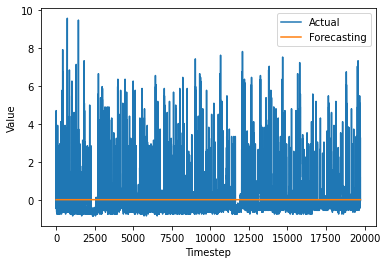

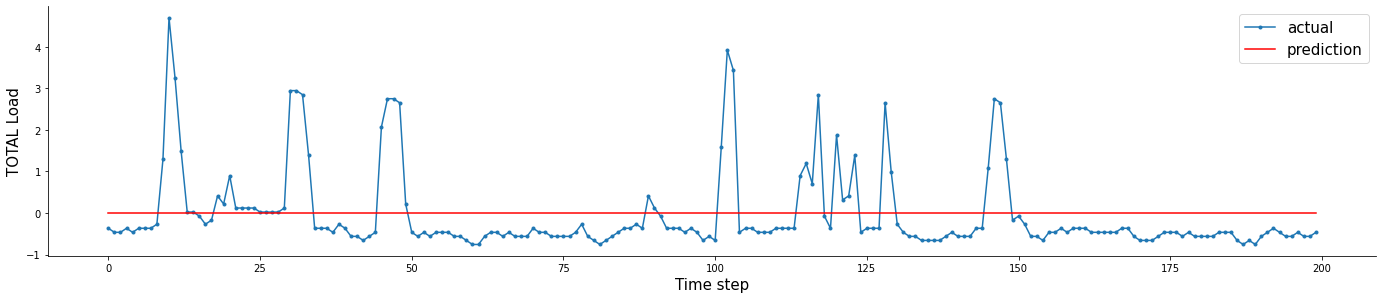

0                        1                       2  \
0      0,9994184744028178        0,999593665751387      0,9995870911025362   
1       0,766340918000467       0,7655212345012639      0,7655519959014133   
2       281,8078701450838       403,10611756654913      396,69506958428536   
3      0,6192396754186527       0,6193372929140651      0,6193336271512332   
4       1.000024074312983       1.0000229592580143      1.0000229938861136   
5      102,52476111860474       102,52464680061259      102,52465035076472   
6  -4,325781333580636e-06  -2,0957166801949256e-06  -2,164971435236751e-06   
7                     234                      237                     234   

                        3                       4           nama  
0      0,9993350908659924      0,9994605258055097        mminmax  
1      0,7667310520441801      0,7661441683254031  minmax invert  
2      246,52667301239973       303,7376923765468         zscore  
3      0,6191932590767949      0,6192630948806089  zscpre invert  
4       1.000024745414809      1.0000237702114176           rmse  
5      102,52482992150276      102,52472994141499    rmse invert  
6  -5,667958930422046e-06  -3,717590306484553e-06             r2  
7                     236                     236          waktu

In [26]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto8
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(38, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 38, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=80, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto8") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto8")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto8")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc